------------------
## Caso 1 — Serie temporal de una variable econométrica

<font color="red">

- Aplicar regrsion lineal
- Mirr el ajuste d la prediccion mediante MSE, R^2
- Aplicar ventanas cruzadass


**``INFORME SOBRE QUE HACER (25/10)``**

- Hoy he hecho el problema 2 y 3. En el problema 3, tras aplicar los codigos, observo que no hace falta usar la transformacion box-co.
- Eliminar el codigo que incluye box-cox

**``INFORME 31/10``**

- Relacionar lo que hemos dado en ALN con el codigo
- Me he dado cuenta que el modelo de ridge es el mejor para esta serie temporal
- Hay que ajustar el codigo y empezar a eliminar codigos o comentarlos como los codigos de arima
</font>

El siguiente archivo ( ```csv```) contiene la evolución temporal de una variable econométrica:

[Descarga estos datos](https://drive.upm.es/s/Qsd5K7P6aDZpfcj)

Los datos incluyen dos columnas. La primera es una fecha (tiempo), y la segunda es el valor econométrico a estudiar. Crea un modelo predictivo y predice el valor de la variable econométrica a fecha **1 de enero de 2026.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import matplotlib.dates as mdates
import seaborn as sns

### 1. EDA: Analisis exploratorio de datos

#### 1.1 Compresión del dataset

In [2]:
# Inspeccionamos el csv
df = pd.read_csv("variable_economica.csv")

print("----- VALORES ESTADISTICOS PRINCIPALES DEL DATASET-----\n",df.describe())

print("\n----- DESCRIPCION DEL DATASET-----")
df.info()



----- VALORES ESTADISTICOS PRINCIPALES DEL DATASET-----
             value
count  744.000000
mean   371.056077
std     46.614905
min    262.869000
25%    336.199500
50%    367.170000
75%    401.519500
max    505.886000

----- DESCRIPCION DEL DATASET-----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    744 non-null    object 
 1   value   744 non-null    float64
dtypes: float64(1), object(1)
memory usage: 11.8+ KB


#### 1.2 Visualización de datos

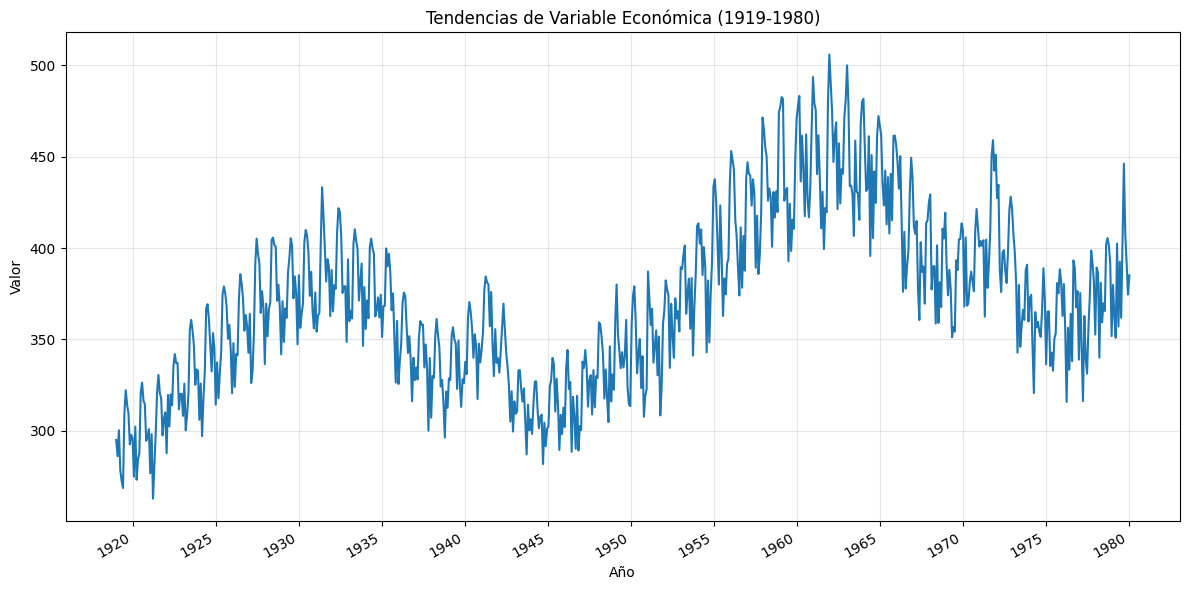

In [3]:
# Visualizacion de datos
# Cargar los datos
df = pd.read_csv('variable_economica.csv')

# Convertir la columna de fecha a formato datetime
df['date'] = pd.to_datetime(df['date'])

# Crear el gráfico
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['value'])

# Formatear el gráfico
plt.title('Tendencias de Variable Económica (1919-1980)')
plt.xlabel('Año')
plt.ylabel('Valor')
plt.grid(True, alpha=0.3)

# Formatear el eje x para mostrar los años correctamente
plt.gca().xaxis.set_major_locator(mdates.YearLocator(5))  # Mostrar cada 5 años
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Rotar etiquetas de fecha para mejor legibilidad
plt.gcf().autofmt_xdate()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

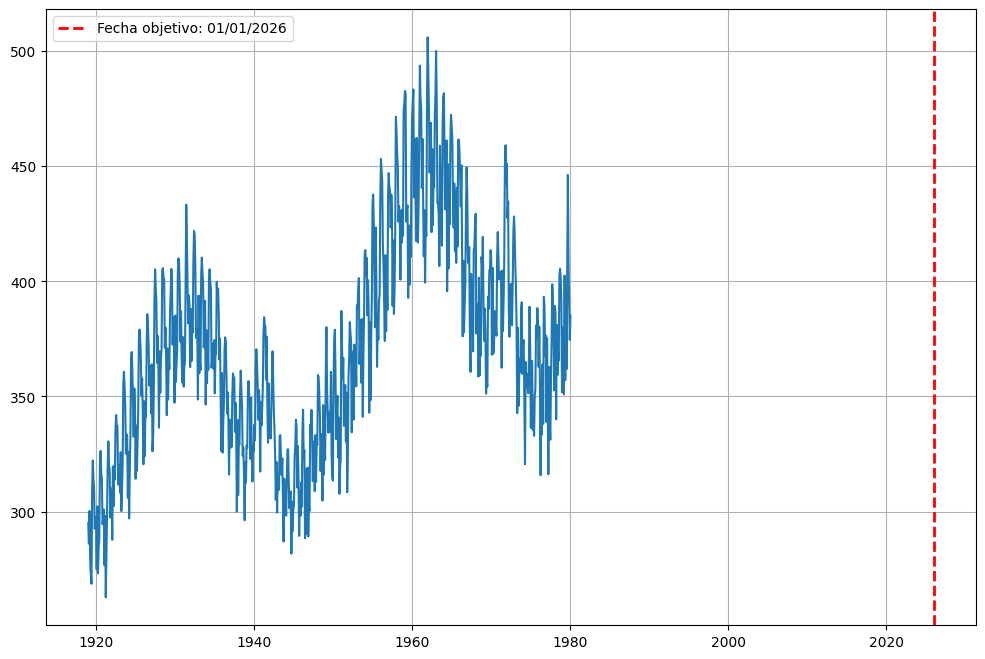

In [4]:
# Fecha que queremos predecir
data = pd.read_csv("variable_economica.csv", index_col="date", parse_dates=["date"])
target_date = pd.to_datetime('2026-01-01')
# Vista general de los datos
plt.figure(figsize=(12, 8))
plt.plot(data)
plt.axvline(target_date, color='r', linestyle='--', linewidth=2, label='Fecha objetivo: 01/01/2026')
plt.legend()
plt.grid()


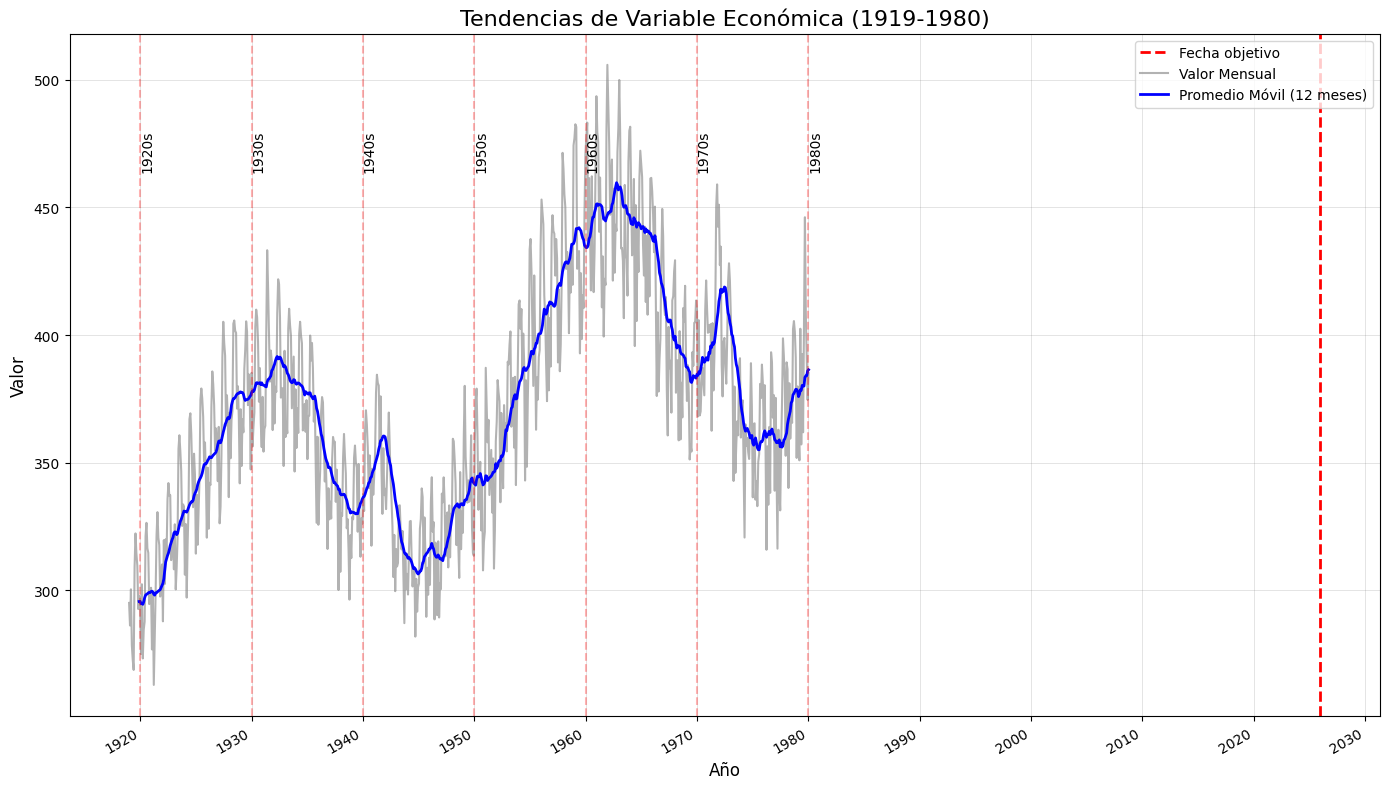

In [5]:
# Enfoque avanzado con analisis de tendencias

# Calcular promedio móvil de 12 meses para suavizar fluctuaciones
df['promedio_movil'] = df['value'].rolling(window=12).mean()

# Crear el gráfico
fig, ax = plt.subplots(figsize=(14, 8))

# Fecha que queremos predecir
plt.axvline(target_date, color='r', linestyle='--', linewidth=2, label='Fecha objetivo')

# Graficar datos crudos y promedio móvil
ax.plot(df['date'], df['value'], label='Valor Mensual', color='grey', alpha=0.6)
ax.plot(df['date'], df['promedio_movil'], label='Promedio Móvil (12 meses)', 
        color='blue', linewidth=2)

# Formatear el gráfico
ax.set_title('Tendencias de Variable Económica (1919-1980)', fontsize=16)
ax.set_xlabel('Año', fontsize=12)
ax.set_ylabel('Valor', fontsize=12)
ax.grid(True, alpha=0.3)
ax.legend()

# Formatear el eje x
ax.xaxis.set_major_locator(mdates.YearLocator(10))  # Mostrar cada 10 años
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Añadir separaciones por década y anotaciones
decades = range(1920, 1990, 10)
for decade in decades:
    ax.axvline(pd.Timestamp(f'{decade}-01-01'), color='red', linestyle='--', alpha=0.3)
    ax.text(pd.Timestamp(f'{decade}-01-01'), df['value'].max() * 0.95, f'{decade}s', 
            rotation=90, verticalalignment='top')

# Rotar etiquetas de fecha
fig.autofmt_xdate()

# Añadir cuadrícula para mejor legibilidad
ax.grid(True, which='major', linestyle='-', linewidth='0.5', color='gray', alpha=0.3)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

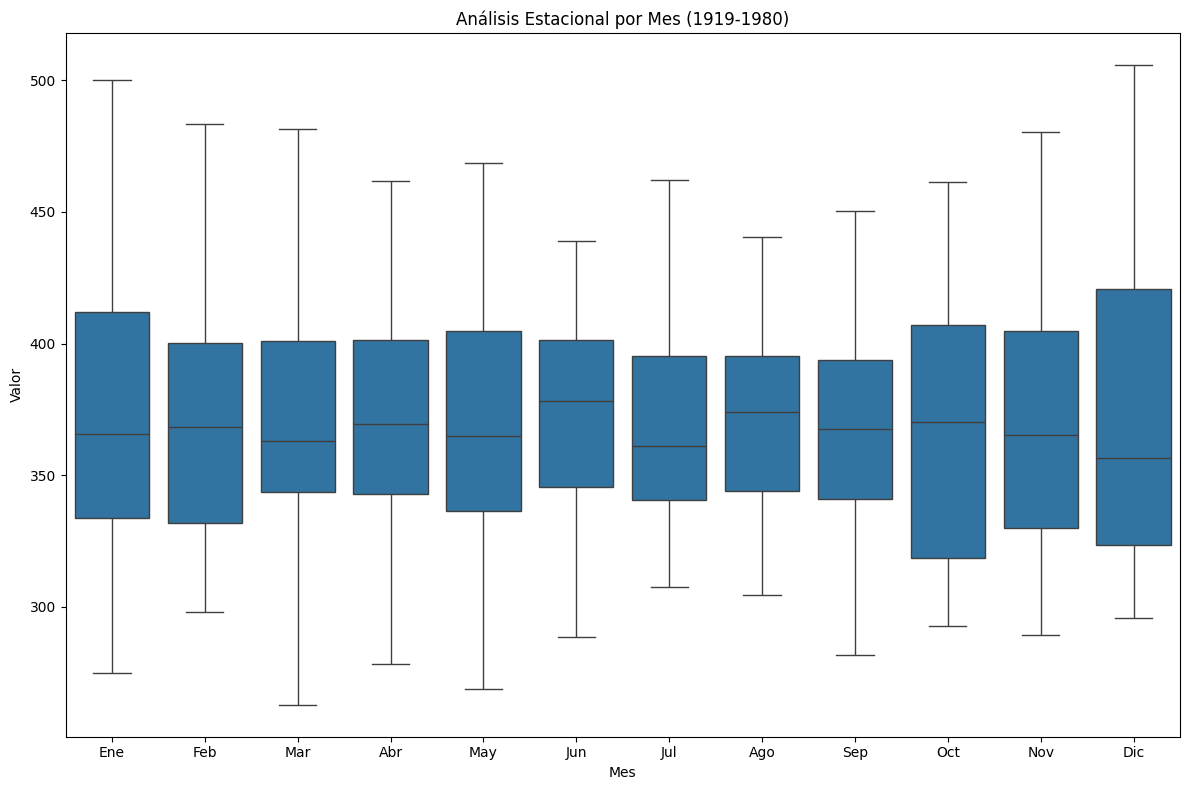

In [6]:
# Analisis estacional

# Extraer mes y año
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

# Crear gráfico estacional
plt.figure(figsize=(12, 8))
sns.boxplot(x='month', y='value', data=df)
plt.title('Análisis Estacional por Mes (1919-1980)')
plt.xlabel('Mes')
plt.ylabel('Valor')
plt.xticks(range(12), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 
                      'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.tight_layout()
plt.show()

#### 1.3 Análisis Estadístico

In [7]:
# Test de estacionariedad(ADF): Determinar si la serie es estacionaria

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

# Test de estacionariedad
result = adfuller(df['value'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

# Descomposición estacional
decomposition = seasonal_decompose(df.set_index('date')['value'], 
                                   model='additive', 
                                   period=12)




ADF Statistic: -2.0542506934398324
p-value: 0.26330381167065486


- La serie temporal es **``NO ESTACIONARIA``**, lo cual significa que tiene propiedades **estadísticas** (media, varianza) que cambian a lo largo del tiempo.
    - El p-valor es alto (0.263 > 0.05)
- Esto significa que si empleamos el modelo **``ARIMA``**, obtendríamos valores inprecisos.

In [8]:
# Test de Normalidad: Verificar si los datos siguen distribucion normal

# Test de Jarque Bera: basado en asimetria y curtosis
from scipy.stats import jarque_bera

stat, p_value = jarque_bera(df['value'])
print(f"\nJarque-Bera Test:")
print(f"  Statistic: {stat:.4f}")
print(f"  p-value: {p_value:.4f}")

if p_value > 0.05:
    print("  ✓ Los datos son aproximadamente normales")
else:
    print("  ✗ Los datos NO son normales (asimetría/curtosis excesiva)")



Jarque-Bera Test:
  Statistic: 18.1595
  p-value: 0.0001
  ✗ Los datos NO son normales (asimetría/curtosis excesiva)


In [9]:
# Test de heterocedasticidad: Detectar si la varianza cambia a lo largo del tiempo

# Test de white
from statsmodels.stats.diagnostic import het_white
from statsmodels.tools import add_constant

# Crear variable temporal
df['time'] = range(len(df))

# Regresión simple: value ~ time
X = add_constant(df['time'])
y = df['value']

# Test de White
white_test = het_white(y, X)

print("Test de White para Heterocedasticidad:")
print(f"  LM Statistic: {white_test[0]:.4f}")
print(f"  p-value: {white_test[1]:.4f}")

if white_test[1] < 0.05:
    print("  ✗ Hay heterocedasticidad (varianza no constante)")
    print("  → Considerar transformación log o modelos GARCH")
else:
    print("  ✓ No hay evidencia de heterocedasticidad")


Test de White para Heterocedasticidad:
  LM Statistic: 188.3320
  p-value: 0.0000
  ✗ Hay heterocedasticidad (varianza no constante)
  → Considerar transformación log o modelos GARCH


In [10]:
# Test de Autocorrelación: Detectar correlacion entre valores de la serie en diferetnes lags

# Test de Ljung-Box
from statsmodels.stats.diagnostic import acorr_ljungbox

lb_test = acorr_ljungbox(df['value'], lags=24, return_df=True)

print("Test de Ljung-Box para Autocorrelación:")
print(lb_test.tail())

# Contar cuántos lags tienen autocorrelación significativa
significant_lags = (lb_test['lb_pvalue'] < 0.05).sum()
print(f"\nLags con autocorrelación significativa: {significant_lags}/24")

if significant_lags > 0:
    print("  ✓ HAY autocorrelación (esperado en series temporales)")
    print("  → Usar modelos que capturen dependencia temporal (ARIMA, LSTM)")


Test de Ljung-Box para Autocorrelación:
         lb_stat  lb_pvalue
20   8344.844897        0.0
21   8696.348413        0.0
22   9105.007906        0.0
23   9537.684698        0.0
24  10059.349434        0.0

Lags con autocorrelación significativa: 24/24
  ✓ HAY autocorrelación (esperado en series temporales)
  → Usar modelos que capturen dependencia temporal (ARIMA, LSTM)


### 2. Preprocesamiento de datos

#### 2.1 Limpieza de datos

<font color="red">

ESTA PARTE PODRIA BORRARLA YA QUE LOS DATOS QUE NOS HA DADO KIKE ESTAN LIMPIOS

</font>

#### 2.2 Transformación de datos

**``Transformacion Box-Cox para Heterocedasticidad y Normalidad``**

**Objetivo**: Estabilizar varianza y normalizar distribucion simultaneamente.

La transformación ``Box-Cox`` resuelve dos problemas a la vez:​
- **Heterocedasticidad**: Varianza constante a lo largo del tiempo
- **No normalidad**: Aproxima los datos a distribución normal


<font color="red">

EN VEZ DE USAR BOX-COX, UNA OPCION MÁS SIMPLE SERIA USAR ``np.log(df["value])``
</font>

PASO 1: TRANSFORMACIÓN BOX-COX

Lambda óptimo encontrado: -0.1872

Interpretación del lambda:
  < 0 → Transformación inversa (1/x^0.19)

Test de Shapiro-Wilk (normalidad):
  Original: p-value = 0.000004 (No normal)
  Box-Cox: p-value = 0.030445 (No normal)
  Mejora: 7119.99x

Coeficiente de Variación de la Varianza (menor = mejor):
  Original: 0.1937
  Box-Cox: 0.3491
  Reducción: -80.3%


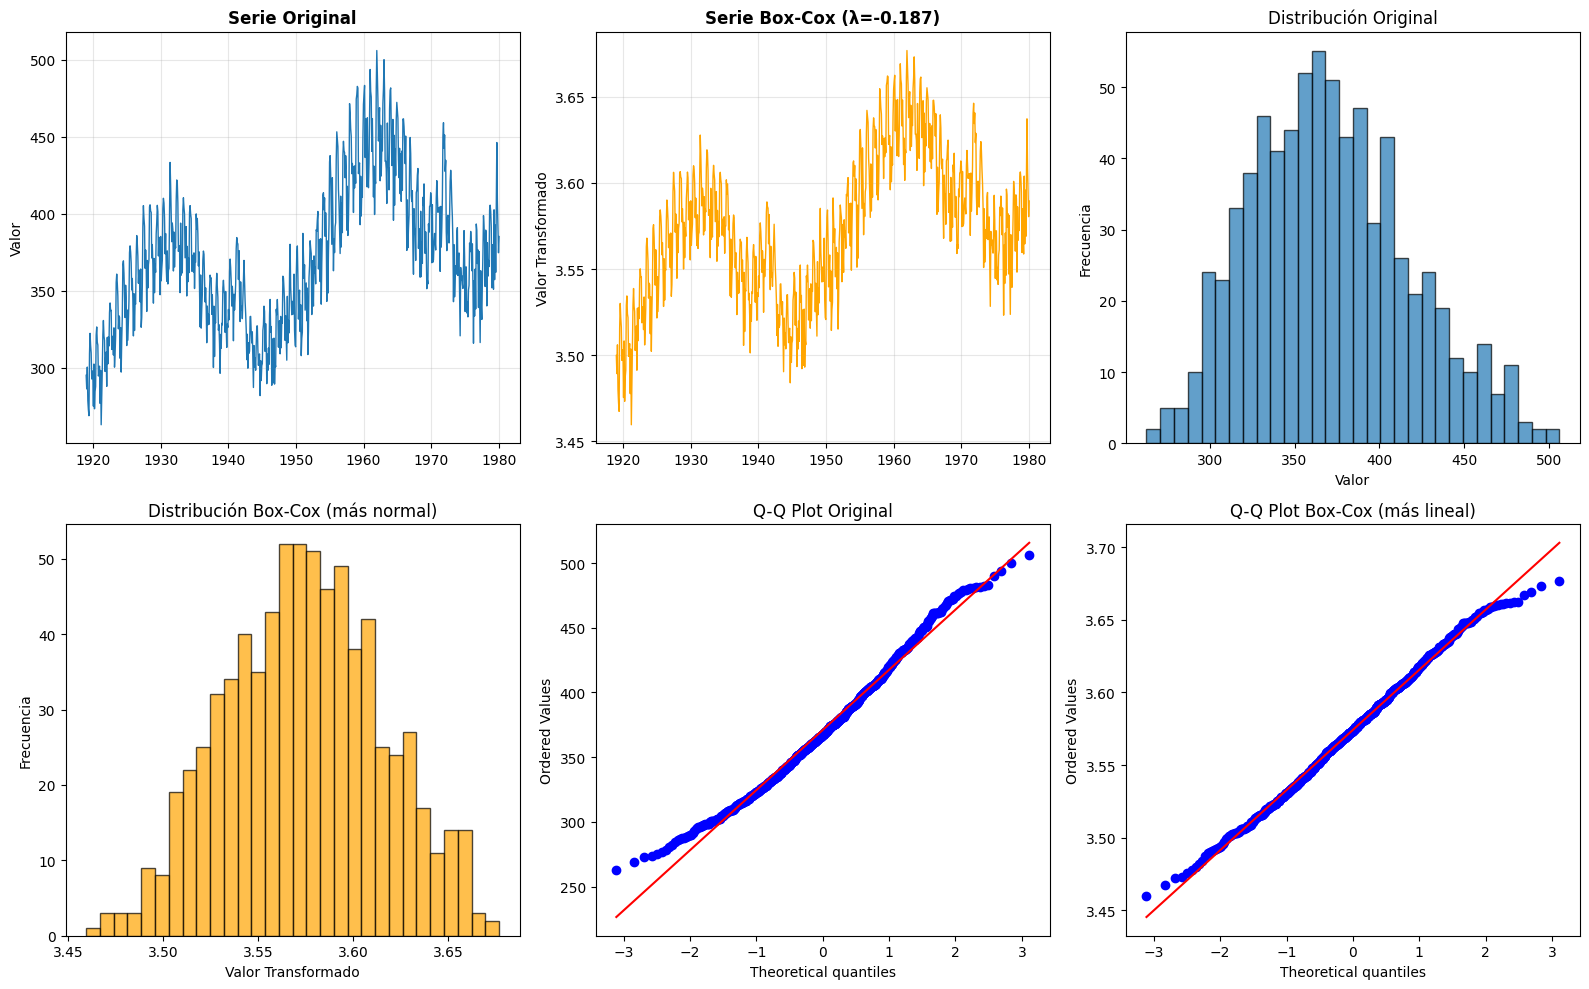


✓ Gráficos guardados en 'transformacion_boxcox.png'


In [11]:
import pandas as pd
import numpy as np
from scipy.stats import boxcox
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# Cargar datos
df = df.sort_values('date').reset_index(drop=True)

print("="*70)
print("PASO 1: TRANSFORMACIÓN BOX-COX")
print("="*70)

# Box-Cox requiere valores positivos
if (df['value'] <= 0).any():
    print("⚠ Advertencia: Datos contienen valores ≤ 0")
    print("  Aplicando desplazamiento para hacer todos los valores positivos")
    df['value_shifted'] = df['value'] - df['value'].min() + 1
    data_to_transform = df['value_shifted']
else:
    data_to_transform = df['value']

# Aplicar Box-Cox (encuentra lambda óptimo automáticamente)
df['value_boxcox'], lambda_param = boxcox(data_to_transform)

print(f"\nLambda óptimo encontrado: {lambda_param:.4f}")
print("\nInterpretación del lambda:")
if abs(lambda_param - 0) < 0.1:
    print("  ≈ 0.0 → Transformación logarítmica")
elif abs(lambda_param - 0.5) < 0.1:
    print("  ≈ 0.5 → Transformación raíz cuadrada")
elif abs(lambda_param - 1) < 0.1:
    print("  ≈ 1.0 → Sin transformación necesaria")
elif lambda_param < 0:
    print(f"  < 0 → Transformación inversa (1/x^{abs(lambda_param):.2f})")
else:
    print(f"  {lambda_param:.2f} → Transformación potencia (x^{lambda_param:.2f})")

# Guardar lambda para invertir transformación después
np.save('lambda_boxcox.npy', lambda_param)

# Verificar mejora en normalidad
from scipy.stats import shapiro

_, p_original = shapiro(df['value'])
_, p_transformed = shapiro(df['value_boxcox'])

print(f"\nTest de Shapiro-Wilk (normalidad):")
print(f"  Original: p-value = {p_original:.6f} ({'Normal' if p_original > 0.05 else 'No normal'})")
print(f"  Box-Cox: p-value = {p_transformed:.6f} ({'Normal' if p_transformed > 0.05 else 'No normal'})")
print(f"  Mejora: {p_transformed/p_original:.2f}x")

# Verificar mejora en heterocedasticidad
# Dividir serie en ventanas y calcular varianza
window_size = len(df) // 5
variances_original = [df['value'][i:i+window_size].var() 
                      for i in range(0, len(df)-window_size, window_size)]
variances_boxcox = [df['value_boxcox'][i:i+window_size].var() 
                    for i in range(0, len(df)-window_size, window_size)]

cv_original = np.std(variances_original) / np.mean(variances_original)
cv_boxcox = np.std(variances_boxcox) / np.mean(variances_boxcox)

print(f"\nCoeficiente de Variación de la Varianza (menor = mejor):")
print(f"  Original: {cv_original:.4f}")
print(f"  Box-Cox: {cv_boxcox:.4f}")
print(f"  Reducción: {(1 - cv_boxcox/cv_original)*100:.1f}%")

# Visualización
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# Serie original vs transformada
axes[0, 0].plot(df['date'], df['value'], linewidth=1)
axes[0, 0].set_title('Serie Original', fontweight='bold')
axes[0, 0].set_ylabel('Valor')
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].plot(df['date'], df['value_boxcox'], linewidth=1, color='orange')
axes[0, 1].set_title(f'Serie Box-Cox (λ={lambda_param:.3f})', fontweight='bold')
axes[0, 1].set_ylabel('Valor Transformado')
axes[0, 1].grid(True, alpha=0.3)

# Histogramas
axes[0, 2].hist(df['value'], bins=30, edgecolor='black', alpha=0.7)
axes[0, 2].set_title('Distribución Original')
axes[0, 2].set_xlabel('Valor')
axes[0, 2].set_ylabel('Frecuencia')

axes[1, 0].hist(df['value_boxcox'], bins=30, edgecolor='black', 
                alpha=0.7, color='orange')
axes[1, 0].set_title('Distribución Box-Cox (más normal)')
axes[1, 0].set_xlabel('Valor Transformado')
axes[1, 0].set_ylabel('Frecuencia')

# Q-Q plots
from scipy import stats
stats.probplot(df['value'], dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot Original')

stats.probplot(df['value_boxcox'], dist="norm", plot=axes[1, 2])
axes[1, 2].set_title('Q-Q Plot Box-Cox (más lineal)')

plt.tight_layout()
plt.savefig('transformacion_boxcox.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Gráficos guardados en 'transformacion_boxcox.png'")


**``Transformacion Diferenciacion``**


PASO 2: DIFERENCIACIÓN PARA ESTACIONARIEDAD

Test ADF en serie diferenciada:
  ADF Statistic: -5.1700
  p-value: 0.0000
  ✓ Serie diferenciada ES ESTACIONARIA

Serie final: Box-Cox + Diferenciación (d=1)
Observaciones válidas: 733/744


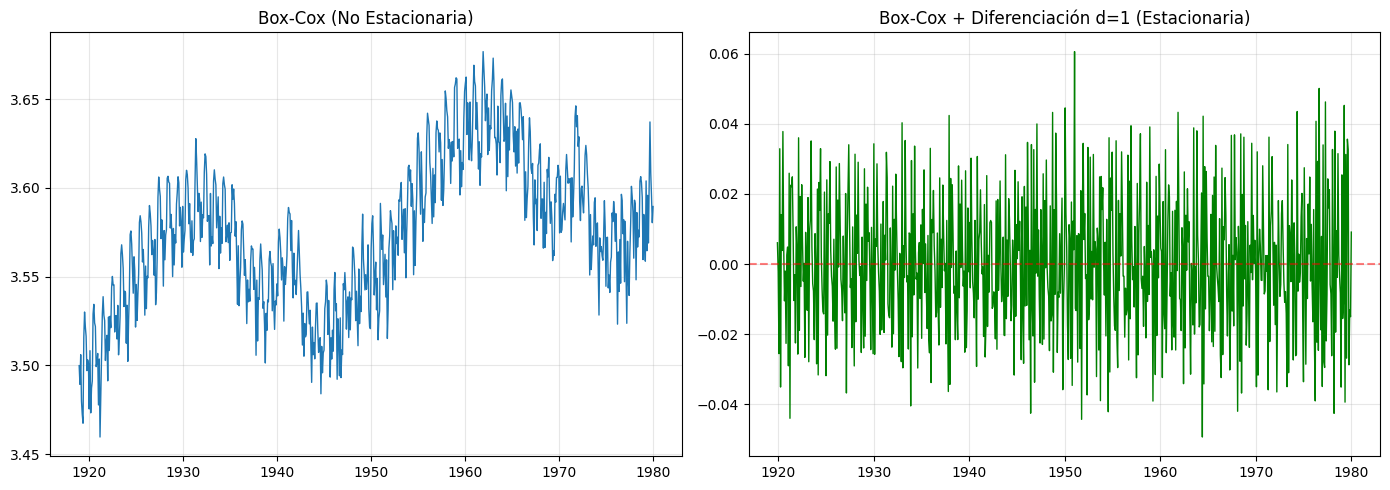

In [12]:
# ========================================
# PASO 2: DIFERENCIACIÓN
# ========================================

print("\n" + "="*70)
print("PASO 2: DIFERENCIACIÓN PARA ESTACIONARIEDAD")
print("="*70)

# Aplicar diferenciación a datos Box-Cox
df['value_diff1'] = df['value_boxcox'].diff()

# Test ADF en serie diferenciada
from statsmodels.tsa.stattools import adfuller

result_diff1 = adfuller(df['value_diff1'].dropna())

print(f"\nTest ADF en serie diferenciada:")
print(f"  ADF Statistic: {result_diff1[0]:.4f}")
print(f"  p-value: {result_diff1[1]:.4f}")

if result_diff1[1] < 0.05:
    print(f"  ✓ Serie diferenciada ES ESTACIONARIA")
    d_param = 1
    df['value_transformed'] = df['value_diff1']
else:
    print(f"  ✗ Primera diferencia no es suficiente, probando segunda...")
    
    df['value_diff2'] = df['value_diff1'].diff()
    result_diff2 = adfuller(df['value_diff2'].dropna())
    
    print(f"\nTest ADF en segunda diferencia:")
    print(f"  ADF Statistic: {result_diff2[0]:.4f}")
    print(f"  p-value: {result_diff2[1]:.4f}")
    
    if result_diff2[1] < 0.05:
        print(f"  ✓ Segunda diferencia ES ESTACIONARIA")
        d_param = 2
        df['value_transformed'] = df['value_diff2']
    else:
        d_param = 1
        df['value_transformed'] = df['value_diff1']

# Guardar parámetro d
np.save('d_parameter.npy', d_param)

# Eliminar NaNs
df_clean = df.dropna().reset_index(drop=True)

print(f"\nSerie final: Box-Cox + Diferenciación (d={d_param})")
print(f"Observaciones válidas: {len(df_clean)}/{len(df)}")

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(df['date'], df['value_boxcox'], linewidth=1)
axes[0].set_title('Box-Cox (No Estacionaria)')
axes[0].grid(True, alpha=0.3)

axes[1].plot(df_clean['date'], df_clean['value_transformed'], 
             linewidth=1, color='green')
axes[1].set_title(f'Box-Cox + Diferenciación d={d_param} (Estacionaria)')
axes[1].axhline(y=0, color='red', linestyle='--', alpha=0.5)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('diferenciacion_estacionariedad.png', dpi=300)
plt.show()


**``Normalizacion y Escalado``**

**Objetivo**: Llevar los datos a un rango comparable para modelos de ML

In [13]:
# ========================================
# PASO 3: NORMALIZACIÓN [0,1]
# ========================================

from sklearn.preprocessing import MinMaxScaler
import joblib

print("\n" + "="*70)
print("PASO 3: NORMALIZACIÓN/ESCALADO")
print("="*70)

# Dividir en train/val/test ANTES de escalar
df_clean = df.dropna().reset_index(drop=True)

train_size = int(len(df_clean) * 0.70)
val_size = int(len(df_clean) * 0.15)

train_df = df_clean[:train_size]
val_df = df_clean[train_size:train_size+val_size]
test_df = df_clean[train_size+val_size:]

print(f"\nDivisión de datos:")
print(f"  Train: {len(train_df)} observaciones ({len(train_df)/len(df_clean)*100:.1f}%)")
print(f"  Val:   {len(val_df)} observaciones ({len(val_df)/len(df_clean)*100:.1f}%)")
print(f"  Test:  {len(test_df)} observaciones ({len(test_df)/len(df_clean)*100:.1f}%)")

# Scaler ajustado SOLO con training
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(train_df[['value_transformed']])

# Transformar todos los conjuntos
df_clean['value_scaled'] = scaler.transform(
    df_clean[['value_transformed']]
)

# Guardar scaler
joblib.dump(scaler, 'scaler_minmax.pkl')

print(f"\n✓ Datos escalados en rango [{df_clean['value_scaled'].min():.4f}, "
      f"{df_clean['value_scaled'].max():.4f}]")
print("✓ Scaler guardado en 'scaler_minmax.pkl'")

# Guardar datos procesados
# df_clean.to_csv('datos_procesados.csv', index=False)
# print("✓ Datos procesados guardados en 'datos_procesados.csv'")



PASO 3: NORMALIZACIÓN/ESCALADO

División de datos:
  Train: 513 observaciones (70.0%)
  Val:   109 observaciones (14.9%)
  Test:  111 observaciones (15.1%)

✓ Datos escalados en rango [-0.0480, 1.0000]
✓ Scaler guardado en 'scaler_minmax.pkl'


### 3. Division de datos

#### 3.1 Validacion cruzada para series temporales

In [14]:
# ========================================
# NUEVA SECCIÓN: VALIDACIÓN WALK-FORWARD
# ========================================

from pmdarima.model_selection import SlidingWindowForecastCV, cross_val_score
import pmdarima as pm

print("\n" + "="*70)
print("VALIDACIÓN WALK-FORWARD (TIME SERIES CROSS-VALIDATION)")
print("="*70)

# Configuración de la validación
# - window_size: tamaño de la ventana de entrenamiento
# - step: cuántos pasos adelante movemos la ventana
# - h: horizonte de predicción (cuántos pasos predecimos)
window_size = 400  # ~33 años de datos históricos
step = 48          # Movemos la ventana 4 años (48 meses)
h = 12             # Predecimos 12 meses adelante

cv = SlidingWindowForecastCV(
    window_size=window_size,
    step=step,
    h=h
)

print(f"\nConfiguración de validación cruzada:")
print(f"  Tamaño de ventana de entrenamiento: {window_size} meses (~{window_size//12} años)")
print(f"  Paso entre validaciones: {step} meses (~{step//12} años)")
print(f"  Horizonte de predicción: {h} meses")

# CORRECCIÓN: Calcular manualmente el número de folds
n_samples = len(df_clean['value_boxcox'])
n_folds = max(0, (n_samples - window_size - h + step) // step)
print(f"\nNúmero estimado de folds: {n_folds}")

# Crear modelo para validación (usando los mismos parámetros que auto_arima encontró)
# Asegúrate de que ya has ejecutado auto_arima antes
# Si no, usa order=(0, 1, 3) como default
modelo_cv = pm.ARIMA(
    order=(0, 1, 3),  # Usar los parámetros que encontró tu auto_arima
    suppress_warnings=True,
    error_action='ignore'
)

# Realizar validación cruzada con múltiples métricas
print("\nEjecutando validación cruzada (esto puede tomar varios minutos)...")
print("Por favor espera...")

try:
    # MAE (Mean Absolute Error)
    mae_scores = cross_val_score(
        modelo_cv, 
        df_clean['value_boxcox'], 
        scoring='mean_absolute_error',
        cv=cv,
        verbose=2  # Muestra progreso
    )
    
    # MSE para calcular RMSE
    mse_scores = cross_val_score(
        modelo_cv,
        df_clean['value_boxcox'],
        scoring='mean_squared_error',
        cv=cv,
        verbose=2
    )
    rmse_scores = np.sqrt(mse_scores)
    
    # SMAPE (Symmetric Mean Absolute Percentage Error)
    smape_scores = cross_val_score(
        modelo_cv,
        df_clean['value_boxcox'],
        scoring='smape',
        cv=cv,
        verbose=2
    )
    
    print("\n" + "="*70)
    print("RESULTADOS DE VALIDACIÓN CRUZADA")
    print("="*70)
    print(f"\nMétricas por fold (en escala Box-Cox):")
    print(f"{'Fold':<8} {'MAE':<12} {'RMSE':<12} {'SMAPE (%)':<12}")
    print("-" * 70)
    for i in range(len(mae_scores)):
        print(f"{i+1:<8} {mae_scores[i]:<12.4f} {rmse_scores[i]:<12.4f} {smape_scores[i]:<12.2f}")
    
    print("\n" + "-" * 70)
    print(f"{'PROMEDIO':<8} {np.mean(mae_scores):<12.4f} {np.mean(rmse_scores):<12.4f} {np.mean(smape_scores):<12.2f}")
    print(f"{'STD':<8} {np.std(mae_scores):<12.4f} {np.std(rmse_scores):<12.4f} {np.std(smape_scores):<12.2f}")
    print("="*70)
    
    # Interpretación
    print("\n📊 INTERPRETACIÓN:")
    print(f"  • MAE promedio: {np.mean(mae_scores):.4f} (error absoluto medio)")
    print(f"  • RMSE promedio: {np.mean(rmse_scores):.4f} (penaliza errores grandes)")
    print(f"  • SMAPE promedio: {np.mean(smape_scores):.2f}% (error porcentual simétrico)")
    print(f"\n  • Estabilidad del modelo: {'ALTA ✅' if np.std(smape_scores) < 5 else 'MEDIA ⚠️' if np.std(smape_scores) < 10 else 'BAJA ❌'}")
    print(f"    (Desv. estándar SMAPE: {np.std(smape_scores):.2f}%)")
    
    # Guardar resultados de validación
    cv_results = pd.DataFrame({
        'Fold': range(1, len(mae_scores) + 1),
        'MAE': mae_scores,
        'RMSE': rmse_scores,
        'SMAPE': smape_scores
    })
    cv_results.to_csv('validacion_cruzada_resultados.csv', index=False)
    print("\n✓ Resultados guardados en 'validacion_cruzada_resultados.csv'")
    
except Exception as e:
    print(f"\n❌ Error durante la validación cruzada: {str(e)}")
    print("Esto puede ocurrir si:")
    print("  1. No hay suficientes datos para los parámetros de CV elegidos")
    print("  2. El modelo ARIMA no converge en algún fold")
    print("\nIntenta ajustar los parámetros:")
    print("  - Reducir window_size (ej: 300)")
    print("  - Aumentar step (ej: 60)")
    print("  - Reducir h (ej: 6)")



VALIDACIÓN WALK-FORWARD (TIME SERIES CROSS-VALIDATION)

Configuración de validación cruzada:
  Tamaño de ventana de entrenamiento: 400 meses (~33 años)
  Paso entre validaciones: 48 meses (~4 años)
  Horizonte de predicción: 12 meses

Número estimado de folds: 7

Ejecutando validación cruzada (esto puede tomar varios minutos)...
Por favor espera...
[CV] fold=0 ..........................................................
[CV] fold=1 ..........................................................


c:\Users\niaib\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\niaib\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


[CV] fold=2 ..........................................................


c:\Users\niaib\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\niaib\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


[CV] fold=3 ..........................................................


c:\Users\niaib\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\niaib\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


[CV] fold=4 ..........................................................


c:\Users\niaib\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\niaib\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


[CV] fold=5 ..........................................................


c:\Users\niaib\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\niaib\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


[CV] fold=6 ..........................................................


c:\Users\niaib\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\niaib\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


[CV] fold=0 ..........................................................
[CV] fold=1 ..........................................................


c:\Users\niaib\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\niaib\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


[CV] fold=2 ..........................................................


c:\Users\niaib\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\niaib\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


[CV] fold=3 ..........................................................


c:\Users\niaib\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\niaib\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


[CV] fold=4 ..........................................................


c:\Users\niaib\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\niaib\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


[CV] fold=5 ..........................................................


c:\Users\niaib\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\niaib\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


[CV] fold=6 ..........................................................


c:\Users\niaib\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\niaib\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


[CV] fold=0 ..........................................................
[CV] fold=1 ..........................................................


c:\Users\niaib\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\niaib\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


[CV] fold=2 ..........................................................


c:\Users\niaib\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\niaib\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


[CV] fold=3 ..........................................................


c:\Users\niaib\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\niaib\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


[CV] fold=4 ..........................................................


c:\Users\niaib\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\niaib\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


[CV] fold=5 ..........................................................


c:\Users\niaib\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\niaib\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


[CV] fold=6 ..........................................................

RESULTADOS DE VALIDACIÓN CRUZADA

Métricas por fold (en escala Box-Cox):
Fold     MAE          RMSE         SMAPE (%)   
----------------------------------------------------------------------
1        0.0174       0.0215       0.49        
2        0.0181       0.0194       0.50        
3        0.0165       0.0188       0.45        
4        0.0125       0.0140       0.34        
5        0.0195       0.0224       0.54        
6        0.0177       0.0233       0.49        
7        0.0173       0.0208       0.49        

----------------------------------------------------------------------
PROMEDIO 0.0170       0.0200       0.47        
STD      0.0020       0.0029       0.06        

📊 INTERPRETACIÓN:
  • MAE promedio: 0.0170 (error absoluto medio)
  • RMSE promedio: 0.0200 (penaliza errores grandes)
  • SMAPE promedio: 0.47% (error porcentual simétrico)

  • Estabilidad del modelo: ALTA ✅
    (Desv. estándar S

c:\Users\niaib\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\niaib\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


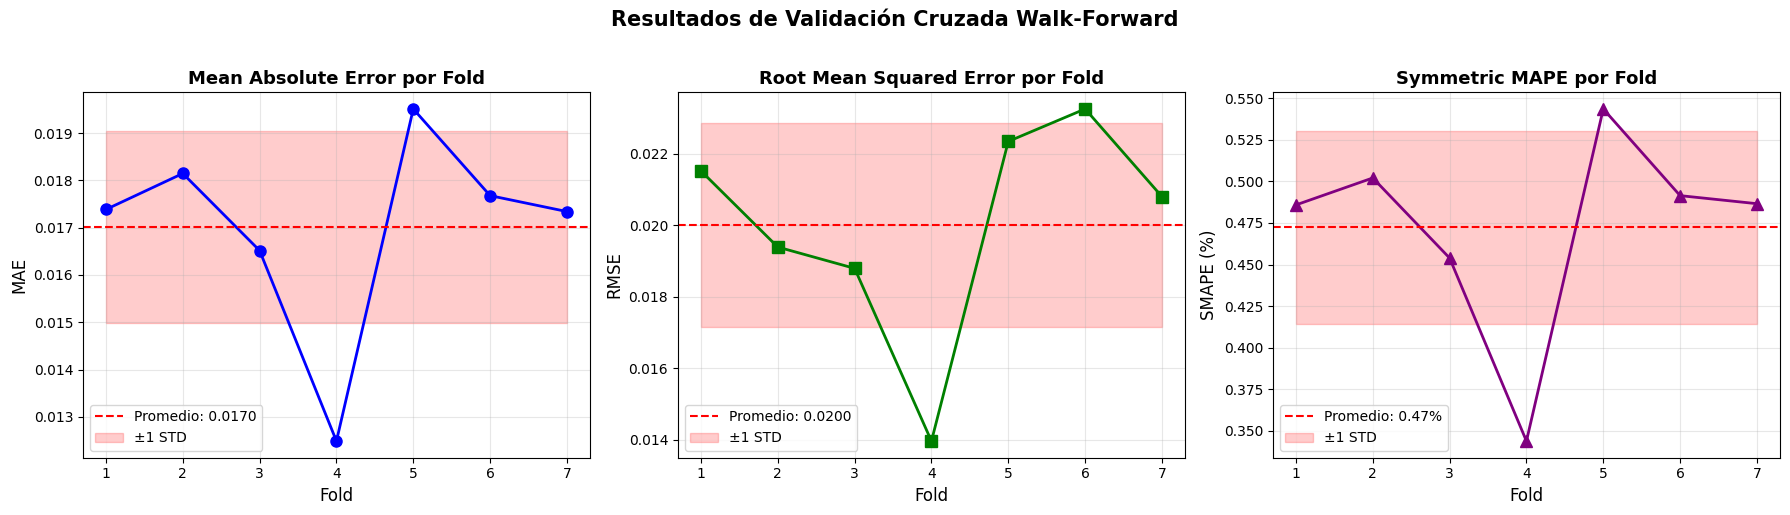

✓ Gráfico guardado en 'validacion_cruzada_metricas.png'


In [15]:
# Visualización de resultados de validación cruzada
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

folds_range = range(1, len(mae_scores) + 1)

# Gráfico 1: MAE por fold
axes[0].plot(folds_range, mae_scores, 
            marker='o', linewidth=2, markersize=8, color='blue')
axes[0].axhline(np.mean(mae_scores), color='red', linestyle='--', 
               label=f'Promedio: {np.mean(mae_scores):.4f}')
axes[0].fill_between(folds_range,
                     np.mean(mae_scores) - np.std(mae_scores),
                     np.mean(mae_scores) + np.std(mae_scores),
                     alpha=0.2, color='red', label=f'±1 STD')
axes[0].set_xlabel('Fold', fontsize=12)
axes[0].set_ylabel('MAE', fontsize=12)
axes[0].set_title('Mean Absolute Error por Fold', fontsize=13, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Gráfico 2: RMSE por fold
axes[1].plot(folds_range, rmse_scores,
            marker='s', linewidth=2, markersize=8, color='green')
axes[1].axhline(np.mean(rmse_scores), color='red', linestyle='--',
               label=f'Promedio: {np.mean(rmse_scores):.4f}')
axes[1].fill_between(folds_range,
                     np.mean(rmse_scores) - np.std(rmse_scores),
                     np.mean(rmse_scores) + np.std(rmse_scores),
                     alpha=0.2, color='red', label=f'±1 STD')
axes[1].set_xlabel('Fold', fontsize=12)
axes[1].set_ylabel('RMSE', fontsize=12)
axes[1].set_title('Root Mean Squared Error por Fold', fontsize=13, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Gráfico 3: SMAPE por fold
axes[2].plot(folds_range, smape_scores,
            marker='^', linewidth=2, markersize=8, color='purple')
axes[2].axhline(np.mean(smape_scores), color='red', linestyle='--',
               label=f'Promedio: {np.mean(smape_scores):.2f}%')
axes[2].fill_between(folds_range,
                     np.mean(smape_scores) - np.std(smape_scores),
                     np.mean(smape_scores) + np.std(smape_scores),
                     alpha=0.2, color='red', label=f'±1 STD')
axes[2].set_xlabel('Fold', fontsize=12)
axes[2].set_ylabel('SMAPE (%)', fontsize=12)
axes[2].set_title('Symmetric MAPE por Fold', fontsize=13, fontweight='bold')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.suptitle('Resultados de Validación Cruzada Walk-Forward', 
            fontsize=15, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('validacion_cruzada_metricas.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Gráfico guardado en 'validacion_cruzada_metricas.png'")


### 4.Seleccion de modelos

In [16]:
# ========================================
# SECCIÓN 4: MODELOS DE PREDICCIÓN
# ========================================

import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [17]:
print("\n" + "="*70)
print("4.1 MODELO ARIMA")
print("="*70)

# Usar datos Box-Cox (sin normalizar) para ARIMA
train_arima = df_clean['value_boxcox'][:train_size]
test_arima = df_clean['value_boxcox'][train_size:]

# Auto ARIMA para encontrar mejores parámetros
print("\nBuscando mejores parámetros ARIMA (puede tardar)...")

auto_model = auto_arima(
    train_arima, 
    seasonal=True,
    m=12,  # período mensual
    max_p=5,
    max_q=5,
    max_d=2,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)

print(f"\n✓ Mejor modelo encontrado: ARIMA{auto_model.order}")
print(f"  AIC: {auto_model.aic():.2f}")


4.1 MODELO ARIMA

Buscando mejores parámetros ARIMA (puede tardar)...
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=-3369.718, Time=0.82 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-2584.164, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-3152.062, Time=0.27 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-2892.317, Time=0.50 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-2586.006, Time=0.02 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=-2937.701, Time=1.59 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=-3210.809, Time=1.09 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=-3376.078, Time=3.56 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=-3303.272, Time=1.80 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=-3331.472, Time=1.45 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=-3337.396, Time=1.96 sec
 ARIMA(1,1,2)(2,0,1)[12] intercept   : AIC=-3366.439, Time=2.98 sec
 ARIMA(2,1,1)(2,0,1)[12] intercept   : AIC=-3382.329, Time=2.61 sec
 A

Total fit time: 74.394 seconds

✓ Mejor modelo encontrado: ARIMA(0, 1, 3)
  AIC: -3453.43

In [18]:
# Entrenar modelo con parámetros óptimos
arima_model = ARIMA(train_arima, order=auto_model.order)
arima_fitted = arima_model.fit()

# Predicciones en conjunto de prueba
arima_predictions_test = arima_fitted.forecast(steps=len(test_arima))

# Predicción hasta 2026
# Calcular meses desde última fecha hasta 2026-01-01
last_date = df_clean['date'].iloc[-1]
target_date = pd.to_datetime('2026-01-01')
months_to_predict = (target_date.year - last_date.year) * 12 + (target_date.month - last_date.month)

# Reentrenar con todos los datos para predicción final
print(f"\nMeses a predecir desde {last_date.date()} hasta 2026-01-01: {months_to_predict}")

arima_full = ARIMA(df_clean['value_boxcox'], order=auto_model.order)
arima_full_fitted = arima_full.fit()

# MODIFICACIÓN: Obtener predicciones CON intervalos de confianza
arima_forecast = arima_full_fitted.get_forecast(steps=months_to_predict)

# Extraer predicciones e intervalos
arima_forecast_2026 = arima_forecast.predicted_mean
conf_int = arima_forecast.conf_int(alpha=0.05)  # Intervalos al 95%

# Mostrar predicción para 2026-01-01 con intervalo
print(f"\n{'='*70}")
print(f"PREDICCIÓN ARIMA PARA 2026-01-01 (en escala Box-Cox):")
print(f"{'='*70}")
print(f"Predicción: {arima_forecast_2026.iloc[-1]:.4f}")
print(f"Límite inferior (95%): {conf_int.iloc[-1, 0]:.4f}")
print(f"Límite superior (95%): {conf_int.iloc[-1, 1]:.4f}")
print(f"Amplitud del intervalo: {conf_int.iloc[-1, 1] - conf_int.iloc[-1, 0]:.4f}")
print(f"{'='*70}\n")

# Guardar modelo
import pickle
with open('arima_model.pkl', 'wb') as f:
    pickle.dump(arima_full_fitted, f)

print("✓ Modelo ARIMA guardado")



Meses a predecir desde 1980-01-11 hasta 2026-01-01: 552

PREDICCIÓN ARIMA PARA 2026-01-01 (en escala Box-Cox):
Predicción: 3.5870
Límite inferior (95%): 2.9527
Límite superior (95%): 4.2213
Amplitud del intervalo: 1.2686

✓ Modelo ARIMA guardado


In [19]:
# ========================================
# NUEVA SECCIÓN: ANÁLISIS DE RESIDUOS
# ========================================

from scipy import stats
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

print("\n" + "="*70)
print("DIAGNÓSTICO DE RESIDUOS DEL MODELO ARIMA")
print("="*70)

# Extraer residuos del modelo ajustado
residuos = arima_full_fitted.resid

print(f"\nEstadísticas básicas de los residuos:")
print(f"  Media: {np.mean(residuos):.6f} (debería estar cerca de 0)")
print(f"  Desv. estándar: {np.std(residuos):.6f}")
print(f"  Mínimo: {np.min(residuos):.6f}")
print(f"  Máximo: {np.max(residuos):.6f}")
print(f"  Asimetría: {stats.skew(residuos):.6f} (0 = simétrico)")
print(f"  Curtosis: {stats.kurtosis(residuos):.6f} (0 = normal)")

# ========================================
# TEST 1: LJUNG-BOX (Autocorrelación)
# ========================================

print("\n" + "="*70)
print("TEST 1: LJUNG-BOX (Prueba de Autocorrelación en Residuos)")
print("="*70)

# Aplicar test de Ljung-Box para diferentes lags
lb_test = acorr_ljungbox(residuos, lags=40, return_df=True)

print("\nH0: Los residuos NO tienen autocorrelación (son ruido blanco)")
print("Ha: Los residuos tienen autocorrelación\n")
print("Si p-valor > 0.05 → NO rechazamos H0 (✅ BUENO: residuos son ruido blanco)")
print("Si p-valor < 0.05 → Rechazamos H0 (❌ MALO: residuos tienen autocorrelación)\n")

# Mostrar primeros lags
print("Primeros 10 lags:")
print(lb_test.head(10).to_string())

# Contar cuántos p-valores son significativos
n_significativos = (lb_test['lb_pvalue'] < 0.05).sum()
porcentaje_sig = (n_significativos / len(lb_test)) * 100

print(f"\n📊 RESULTADO:")
print(f"  • Lags con p-valor < 0.05: {n_significativos}/{len(lb_test)} ({porcentaje_sig:.1f}%)")

if porcentaje_sig < 10:
    print(f"  • ✅ EXCELENTE: Los residuos NO tienen autocorrelación significativa")
    print(f"  • El modelo ARIMA captura bien la estructura temporal")
elif porcentaje_sig < 25:
    print(f"  • ⚠️ ACEPTABLE: Autocorrelación leve en algunos lags")
    print(f"  • El modelo es razonable pero podría mejorarse")
else:
    print(f"  • ❌ PROBLEMA: Autocorrelación significativa detectada")
    print(f"  • El modelo NO captura toda la estructura temporal")
    print(f"  • RECOMENDACIÓN: Considera cambiar el orden ARIMA")

# ========================================
# TEST 2: NORMALIDAD (Jarque-Bera)
# ========================================

print("\n" + "="*70)
print("TEST 2: JARQUE-BERA (Prueba de Normalidad de Residuos)")
print("="*70)

jb_stat, jb_pvalue = stats.jarque_bera(residuos)

print("\nH0: Los residuos siguen una distribución normal")
print("Ha: Los residuos NO siguen una distribución normal\n")
print(f"Estadístico JB: {jb_stat:.4f}")
print(f"P-valor: {jb_pvalue:.4f}\n")

if jb_pvalue > 0.05:
    print(f"✅ NO rechazamos H0: Los residuos son normales (p-valor > 0.05)")
else:
    print(f"⚠️ Rechazamos H0: Los residuos NO son normales (p-valor < 0.05)")
    print(f"   Nota: Para predicción, esto es menos crítico que la autocorrelación")

# ========================================
# TEST 3: HETEROCEDASTICIDAD
# ========================================

print("\n" + "="*70)
print("TEST 3: HETEROCEDASTICIDAD (Varianza Constante)")
print("="*70)

# Dividir residuos en dos mitades y comparar varianzas
mitad = len(residuos) // 2
residuos_primera_mitad = residuos[:mitad]
residuos_segunda_mitad = residuos[mitad:]

var_primera = np.var(residuos_primera_mitad)
var_segunda = np.var(residuos_segunda_mitad)
ratio_varianzas = max(var_primera, var_segunda) / min(var_primera, var_segunda)

print(f"\nVarianza primera mitad: {var_primera:.6f}")
print(f"Varianza segunda mitad: {var_segunda:.6f}")
print(f"Ratio de varianzas: {ratio_varianzas:.2f}\n")

if ratio_varianzas < 1.5:
    print(f"✅ EXCELENTE: Varianza constante (ratio < 1.5)")
elif ratio_varianzas < 2.0:
    print(f"⚠️ ACEPTABLE: Leve heterocedasticidad (ratio < 2.0)")
else:
    print(f"❌ PROBLEMA: Heterocedasticidad significativa (ratio ≥ 2.0)")
    print(f"   RECOMENDACIÓN: La transformación Box-Cox podría necesitar ajuste")

# Guardar resumen de tests
diagnostico_resumen = pd.DataFrame({
    'Test': ['Ljung-Box', 'Jarque-Bera', 'Heterocedasticidad'],
    'Resultado': [
        f'{n_significativos}/{len(lb_test)} lags significativos',
        f'p-valor: {jb_pvalue:.4f}',
        f'Ratio: {ratio_varianzas:.2f}'
    ],
    'Estado': [
        '✅ BUENO' if porcentaje_sig < 10 else '⚠️ REVISAR' if porcentaje_sig < 25 else '❌ MALO',
        '✅ BUENO' if jb_pvalue > 0.05 else '⚠️ REVISAR',
        '✅ BUENO' if ratio_varianzas < 1.5 else '⚠️ REVISAR' if ratio_varianzas < 2.0 else '❌ MALO'
    ]
})

print("\n" + "="*70)
print("RESUMEN DE DIAGNÓSTICOS")
print("="*70)
print(diagnostico_resumen.to_string(index=False))
diagnostico_resumen.to_csv('diagnostico_residuos.csv', index=False)
print("\n✓ Resumen guardado en 'diagnostico_residuos.csv'")



DIAGNÓSTICO DE RESIDUOS DEL MODELO ARIMA

Estadísticas básicas de los residuos:
  Media: 0.004933 (debería estar cerca de 0)
  Desv. estándar: 0.130621
  Mínimo: -0.047640
  Máximo: 3.503119
  Asimetría: 26.202548 (0 = simétrico)
  Curtosis: 698.795890 (0 = normal)

TEST 1: LJUNG-BOX (Prueba de Autocorrelación en Residuos)

H0: Los residuos NO tienen autocorrelación (son ruido blanco)
Ha: Los residuos tienen autocorrelación

Si p-valor > 0.05 → NO rechazamos H0 (✅ BUENO: residuos son ruido blanco)
Si p-valor < 0.05 → Rechazamos H0 (❌ MALO: residuos tienen autocorrelación)

Primeros 10 lags:
     lb_stat  lb_pvalue
1   0.000328   0.985542
2   0.041547   0.979441
3   0.059596   0.996199
4   0.136084   0.997788
5   0.137009   0.999648
6   0.142622   0.999943
7   0.200919   0.999974
8   0.202430   0.999996
9   0.210396   0.999999
10  0.210420   1.000000

📊 RESULTADO:
  • Lags con p-valor < 0.05: 0/40 (0.0%)
  • ✅ EXCELENTE: Los residuos NO tienen autocorrelación significativa
  • El model

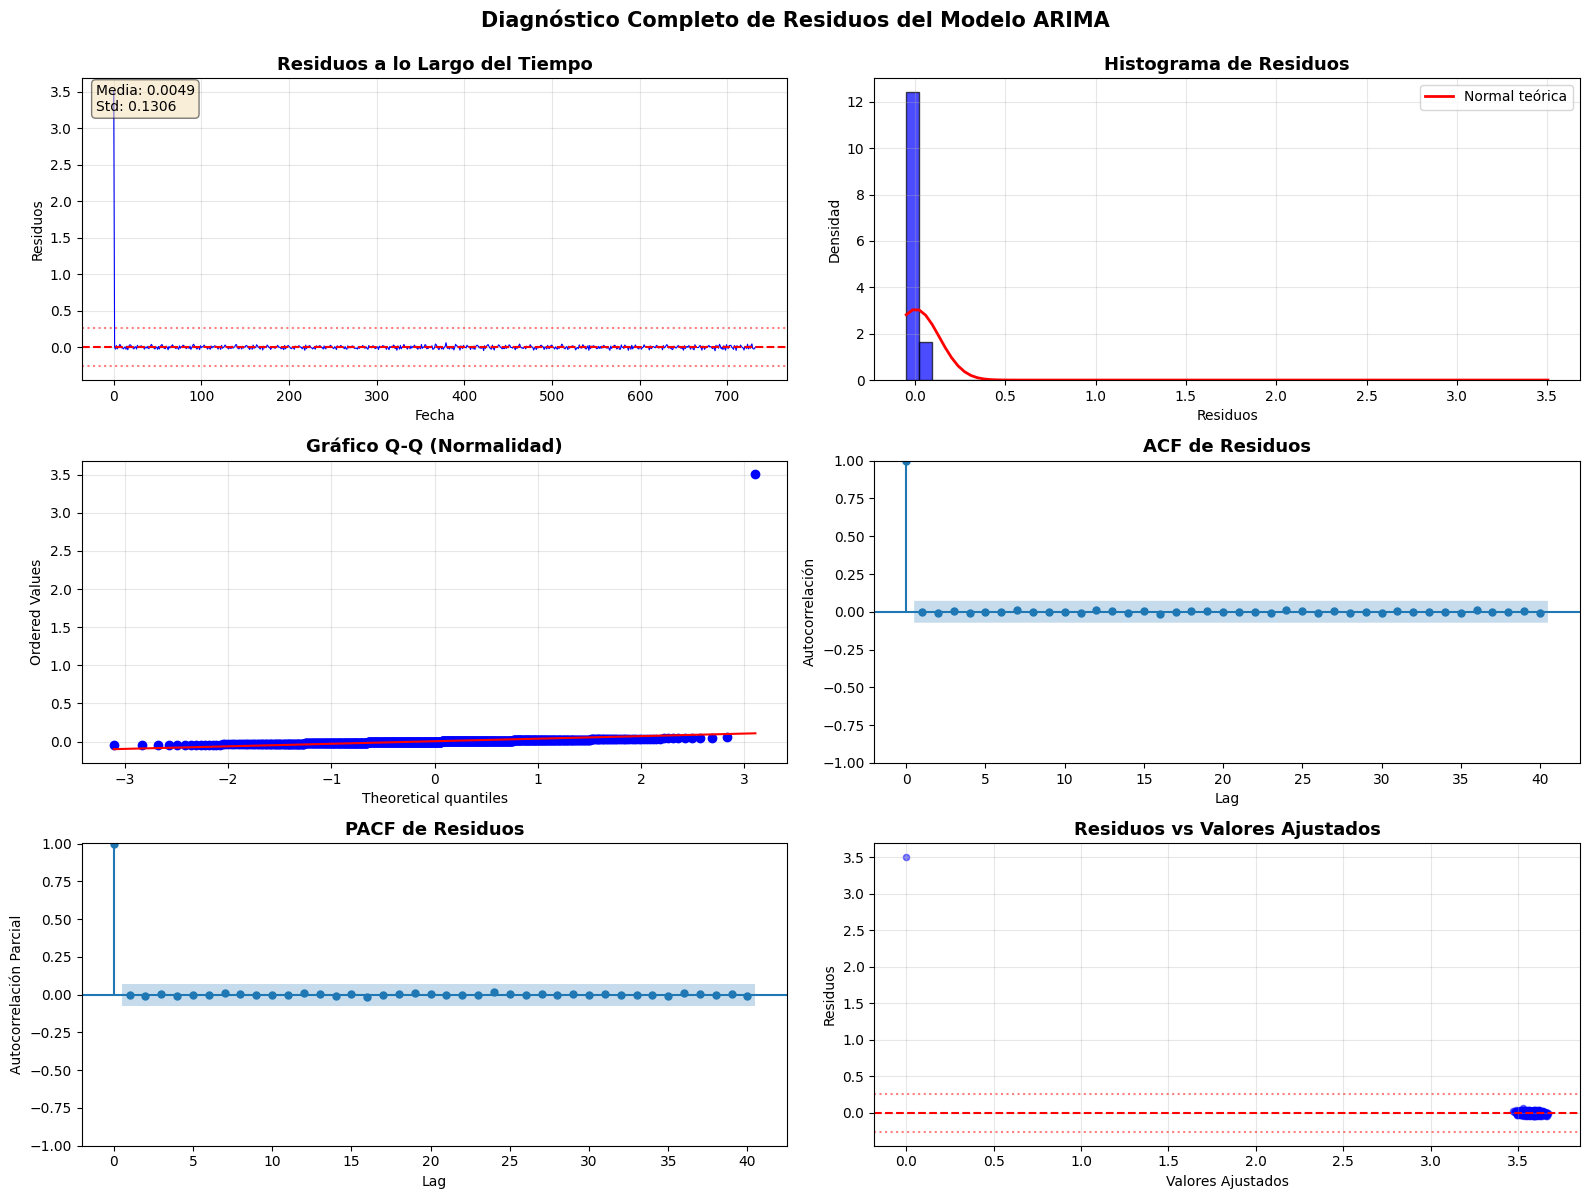

✓ Gráfico guardado en 'diagnostico_residuos_completo.png'


In [20]:
# ========================================
# VISUALIZACIÓN DE RESIDUOS
# ========================================

fig, axes = plt.subplots(3, 2, figsize=(16, 12))

# 1. Serie temporal de residuos
axes[0, 0].plot(df_clean.index, residuos, color='blue', linewidth=0.8)
axes[0, 0].axhline(0, color='red', linestyle='--', linewidth=1.5)
axes[0, 0].axhline(2*np.std(residuos), color='red', linestyle=':', alpha=0.5)
axes[0, 0].axhline(-2*np.std(residuos), color='red', linestyle=':', alpha=0.5)
axes[0, 0].set_title('Residuos a lo Largo del Tiempo', fontsize=13, fontweight='bold')
axes[0, 0].set_xlabel('Fecha')
axes[0, 0].set_ylabel('Residuos')
axes[0, 0].grid(True, alpha=0.3)

# Añadir texto con estadísticas
axes[0, 0].text(0.02, 0.98, f'Media: {np.mean(residuos):.4f}\nStd: {np.std(residuos):.4f}',
               transform=axes[0, 0].transAxes, verticalalignment='top',
               bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# 2. Histograma de residuos con curva normal
axes[0, 1].hist(residuos, bins=50, density=True, alpha=0.7, color='blue', edgecolor='black')
mu, std = np.mean(residuos), np.std(residuos)
x = np.linspace(residuos.min(), residuos.max(), 100)
axes[0, 1].plot(x, stats.norm.pdf(x, mu, std), 'r-', linewidth=2, label='Normal teórica')
axes[0, 1].set_title('Histograma de Residuos', fontsize=13, fontweight='bold')
axes[0, 1].set_xlabel('Residuos')
axes[0, 1].set_ylabel('Densidad')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Gráfico Q-Q (Normalidad)
stats.probplot(residuos, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Gráfico Q-Q (Normalidad)', fontsize=13, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# 4. ACF de residuos
plot_acf(residuos, lags=40, ax=axes[1, 1], alpha=0.05)
axes[1, 1].set_title('ACF de Residuos', fontsize=13, fontweight='bold')
axes[1, 1].set_xlabel('Lag')
axes[1, 1].set_ylabel('Autocorrelación')

# 5. PACF de residuos
plot_pacf(residuos, lags=40, ax=axes[2, 0], alpha=0.05)
axes[2, 0].set_title('PACF de Residuos', fontsize=13, fontweight='bold')
axes[2, 0].set_xlabel('Lag')
axes[2, 0].set_ylabel('Autocorrelación Parcial')

# 6. Residuos vs Valores Ajustados
valores_ajustados = df_clean['value_boxcox'] - residuos
axes[2, 1].scatter(valores_ajustados, residuos, alpha=0.5, s=20, color='blue')
axes[2, 1].axhline(0, color='red', linestyle='--', linewidth=1.5)
axes[2, 1].axhline(2*np.std(residuos), color='red', linestyle=':', alpha=0.5)
axes[2, 1].axhline(-2*np.std(residuos), color='red', linestyle=':', alpha=0.5)
axes[2, 1].set_title('Residuos vs Valores Ajustados', fontsize=13, fontweight='bold')
axes[2, 1].set_xlabel('Valores Ajustados')
axes[2, 1].set_ylabel('Residuos')
axes[2, 1].grid(True, alpha=0.3)

plt.suptitle('Diagnóstico Completo de Residuos del Modelo ARIMA', 
            fontsize=15, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig('diagnostico_residuos_completo.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Gráfico guardado en 'diagnostico_residuos_completo.png'")


In [21]:
# ========================================
# CONCLUSIONES DEL DIAGNÓSTICO
# ========================================

print("\n" + "="*70)
print("CONCLUSIONES DEL ANÁLISIS DE RESIDUOS")
print("="*70)

# Criterios de evaluación
autocorr_ok = porcentaje_sig < 10
normalidad_ok = jb_pvalue > 0.05
homoced_ok = ratio_varianzas < 1.5

puntos_buenos = sum([autocorr_ok, normalidad_ok, homoced_ok])

print(f"\n✓ Tests superados: {puntos_buenos}/3\n")

if puntos_buenos == 3:
    print("🎉 MODELO EXCELENTE:")
    print("  • Los residuos son ruido blanco (sin autocorrelación)")
    print("  • Los residuos son normales")
    print("  • La varianza es constante (homocedasticidad)")
    print("  • El modelo ARIMA(0,1,3) es APROPIADO para estos datos")
    print("  • Las predicciones para 2026 son estadísticamente válidas")
    
elif puntos_buenos == 2:
    print("👍 MODELO BUENO:")
    print("  • El modelo cumple la mayoría de los supuestos")
    if not autocorr_ok:
        print("  • ⚠️ MEJORA: Revisar orden ARIMA por autocorrelación en residuos")
    if not normalidad_ok:
        print("  • ⚠️ NOTA: Falta de normalidad (menos crítico para predicción)")
    if not homoced_ok:
        print("  • ⚠️ MEJORA: Revisar transformación Box-Cox por heterocedasticidad")
    print("  • Las predicciones son razonablemente confiables")
    
else:
    print("⚠️ MODELO MEJORABLE:")
    print("  • El modelo tiene problemas significativos")
    if not autocorr_ok:
        print("  • ❌ CRÍTICO: Autocorrelación en residuos → modelo inadecuado")
        print("     ACCIÓN: Probar ARIMA con diferentes órdenes (p,d,q)")
    if not normalidad_ok:
        print("  • ⚠️ Falta de normalidad (revisar transformaciones)")
    if not homoced_ok:
        print("  • ❌ Heterocedasticidad → revisar transformación Box-Cox")
    print("  • RECOMENDACIÓN: Ajustar modelo antes de usar predicciones")

print("\n" + "="*70)

# Recomendaciones específicas
if not autocorr_ok:
    print("\n💡 RECOMENDACIONES PARA MEJORAR EL MODELO:")
    print("  1. Probar orden SARIMA con componente estacional")
    print("  2. Incrementar orden MA (q): probar ARIMA(0,1,4) o ARIMA(0,1,5)")
    print("  3. Añadir componente AR: probar ARIMA(1,1,3) o ARIMA(2,1,3)")
    print("  4. Verificar si hay cambios estructurales en los datos")
    print("="*70)



CONCLUSIONES DEL ANÁLISIS DE RESIDUOS

✓ Tests superados: 1/3

⚠️ MODELO MEJORABLE:
  • El modelo tiene problemas significativos
  • ⚠️ Falta de normalidad (revisar transformaciones)
  • ❌ Heterocedasticidad → revisar transformación Box-Cox
  • RECOMENDACIÓN: Ajustar modelo antes de usar predicciones



In [22]:
# ========================================
# NUEVA SECCIÓN: COMPARACIÓN DE MODELOS
# ========================================

print("\n" + "="*70)
print("COMPARACIÓN DE MODELOS ALTERNATIVOS A ARIMA")
print("="*70)

import warnings
warnings.filterwarnings('ignore')

# Preparar datos para comparación
train_size = int(len(df_clean) * 0.8)
train_data = df_clean['value_boxcox'][:train_size]
test_data = df_clean['value_boxcox'][train_size:]

print(f"\nDatos de entrenamiento: {len(train_data)} observaciones")
print(f"Datos de prueba: {len(test_data)} observaciones")

# Diccionario para almacenar resultados
resultados_modelos = {}

# ========================================
# MODELO 1: ARIMA (Tu modelo actual)
# ========================================

print("\n" + "-"*70)
print("MODELO 1: ARIMA")
print("-"*70)

try:
    modelo_arima = pm.auto_arima(train_data, seasonal=False, 
                                   stepwise=True, suppress_warnings=True)
    pred_arima = modelo_arima.predict(n_periods=len(test_data))
    
    mae_arima = np.mean(np.abs(pred_arima - test_data.values))
    rmse_arima = np.sqrt(np.mean((pred_arima - test_data.values)**2))
    mape_arima = np.mean(np.abs((pred_arima - test_data.values) / test_data.values)) * 100
    
    resultados_modelos['ARIMA'] = {
        'MAE': mae_arima,
        'RMSE': rmse_arima,
        'MAPE': mape_arima,
        'Orden': str(modelo_arima.order),
        'Modelo': modelo_arima
    }
    
    print(f"Orden: {modelo_arima.order}")
    print(f"MAE: {mae_arima:.4f}")
    print(f"RMSE: {rmse_arima:.4f}")
    print(f"MAPE: {mape_arima:.2f}%")
    print("✓ Modelo completado exitosamente")
    
except Exception as e:
    print(f"✗ Error: {str(e)[:100]}")

# ========================================
# MODELO 2: SARIMA (Con estacionalidad)
# ========================================

print("\n" + "-"*70)
print("MODELO 2: SARIMA (Seasonal ARIMA)")
print("-"*70)

try:
    # Encontrar orden estacional automáticamente
    modelo_sarima = pm.auto_arima(train_data, 
                                   seasonal=True, 
                                   m=12,  # Periodicidad mensual
                                   stepwise=True, 
                                   suppress_warnings=True)
    pred_sarima = modelo_sarima.predict(n_periods=len(test_data))
    
    mae_sarima = np.mean(np.abs(pred_sarima - test_data.values))
    rmse_sarima = np.sqrt(np.mean((pred_sarima - test_data.values)**2))
    mape_sarima = np.mean(np.abs((pred_sarima - test_data.values) / test_data.values)) * 100
    
    resultados_modelos['SARIMA'] = {
        'MAE': mae_sarima,
        'RMSE': rmse_sarima,
        'MAPE': mape_sarima,
        'Orden': str(modelo_sarima.order),
        'Orden_Estacional': str(modelo_sarima.seasonal_order),
        'Modelo': modelo_sarima
    }
    
    print(f"Orden: {modelo_sarima.order}")
    print(f"Orden Estacional: {modelo_sarima.seasonal_order}")
    print(f"MAE: {mae_sarima:.4f}")
    print(f"RMSE: {rmse_sarima:.4f}")
    print(f"MAPE: {mape_sarima:.2f}%")
    print("✓ Modelo completado exitosamente")
    
except Exception as e:
    print(f"✗ Error: {str(e)[:100]}")

# ========================================
# MODELO 3: Exponential Smoothing
# ========================================

print("\n" + "-"*70)
print("MODELO 3: Exponential Smoothing (Holt-Winters)")
print("-"*70)

try:
    from statsmodels.tsa.holtwinters import ExponentialSmoothing
    
    # Ajustar modelo con estacionalidad aditiva
    modelo_exp = ExponentialSmoothing(train_data, 
                                       seasonal_periods=12,
                                       trend='add',
                                       seasonal='add',
                                       initialization_method='estimated')
    modelo_exp_fitted = modelo_exp.fit(optimized=True)
    
    # Predecir
    pred_exp = modelo_exp_fitted.forecast(steps=len(test_data))
    
    mae_exp = np.mean(np.abs(pred_exp - test_data.values))
    rmse_exp = np.sqrt(np.mean((pred_exp - test_data.values)**2))
    mape_exp = np.mean(np.abs((pred_exp - test_data.values) / test_data.values)) * 100
    
    resultados_modelos['Exponential Smoothing'] = {
        'MAE': mae_exp,
        'RMSE': rmse_exp,
        'MAPE': mape_exp,
        'Trend': 'Aditiva',
        'Seasonal': 'Aditiva',
        'Modelo': modelo_exp_fitted
    }
    
    print(f"Trend: Aditivo | Seasonal: Aditivo")
    print(f"MAE: {mae_exp:.4f}")
    print(f"RMSE: {rmse_exp:.4f}")
    print(f"MAPE: {mape_exp:.2f}%")
    print("✓ Modelo completado exitosamente")
    
except Exception as e:
    print(f"✗ Error: {str(e)[:100]}")

# ========================================
# MODELO 4: Prophet
# ========================================

print("\n" + "-"*70)
print("MODELO 4: Prophet (Facebook)")
print("-"*70)

try:
    from fbprophet import Prophet
    
    # Preparar datos en formato Prophet
    df_prophet = pd.DataFrame({
        'ds': df['date'][:train_size],
        'y': train_data.values
    })
    
    # Ajustar modelo
    modelo_prophet = Prophet(yearly_seasonality=True,
                             weekly_seasonality=False,
                             daily_seasonality=False,
                             interval_width=0.95)
    modelo_prophet.fit(df_prophet)
    
    # Crear dataframe futuro
    future = modelo_prophet.make_future_dataframe(periods=len(test_data), freq='MS')
    forecast = modelo_prophet.predict(future)
    
    # Extraer predicciones
    pred_prophet = forecast['yhat'].tail(len(test_data)).values
    
    mae_prophet = np.mean(np.abs(pred_prophet - test_data.values))
    rmse_prophet = np.sqrt(np.mean((pred_prophet - test_data.values)**2))
    mape_prophet = np.mean(np.abs((pred_prophet - test_data.values) / test_data.values)) * 100
    
    resultados_modelos['Prophet'] = {
        'MAE': mae_prophet,
        'RMSE': rmse_prophet,
        'MAPE': mape_prophet,
        'Modelo': modelo_prophet
    }
    
    print(f"Estacionalidad: Anual automática")
    print(f"MAE: {mae_prophet:.4f}")
    print(f"RMSE: {rmse_prophet:.4f}")
    print(f"MAPE: {mape_prophet:.2f}%")
    print("✓ Modelo completado exitosamente")
    
except ImportError:
    print("✗ Error: Prophet no está instalado. Instala con: pip install fbprophet")
except Exception as e:
    print(f"✗ Error: {str(e)[:100]}")

# ========================================
# RESUMEN COMPARATIVO
# ========================================

print("\n" + "="*70)
print("RESUMEN COMPARATIVO DE MODELOS")
print("="*70)

if resultados_modelos:
    # Crear DataFrame de resultados
    df_resultados = pd.DataFrame({
        'Modelo': list(resultados_modelos.keys()),
        'MAE': [resultados_modelos[m]['MAE'] for m in resultados_modelos.keys()],
        'RMSE': [resultados_modelos[m]['RMSE'] for m in resultados_modelos.keys()],
        'MAPE (%)': [resultados_modelos[m]['MAPE'] for m in resultados_modelos.keys()]
    })
    
    # Ranking
    df_resultados['Ranking MAE'] = df_resultados['MAE'].rank()
    df_resultados['Ranking MAPE'] = df_resultados['MAPE (%)'].rank()
    
    # Ordenar por MAE
    df_resultados = df_resultados.sort_values('MAE')
    
    print("\n" + df_resultados.to_string(index=False))
    
    # Ganador
    modelo_ganador = df_resultados.iloc[0]['Modelo']
    mae_ganador = df_resultados.iloc[0]['MAE']
    mape_ganador = df_resultados.iloc[0]['MAPE (%)']
    
    print("\n" + "="*70)
    print(f"🏆 GANADOR: {modelo_ganador}")
    print(f"   MAE: {mae_ganador:.4f}")
    print(f"   MAPE: {mape_ganador:.2f}%")
    print("="*70)
    
    # Guardar resultados
    df_resultados.to_csv('comparacion_modelos.csv', index=False)
    print("\n✓ Resultados guardados en 'comparacion_modelos.csv'")
else:
    print("\n✗ No se pudieron entrenar suficientes modelos")



COMPARACIÓN DE MODELOS ALTERNATIVOS A ARIMA

Datos de entrenamiento: 586 observaciones
Datos de prueba: 147 observaciones

----------------------------------------------------------------------
MODELO 1: ARIMA
----------------------------------------------------------------------
Orden: (1, 1, 3)
MAE: 0.0286
RMSE: 0.0346
MAPE: 0.80%
✓ Modelo completado exitosamente

----------------------------------------------------------------------
MODELO 2: SARIMA (Seasonal ARIMA)
----------------------------------------------------------------------
Orden: (5, 1, 0)
Orden Estacional: (2, 0, 2, 12)
MAE: 0.0234
RMSE: 0.0293
MAPE: 0.65%
✓ Modelo completado exitosamente

----------------------------------------------------------------------
MODELO 3: Exponential Smoothing (Holt-Winters)
----------------------------------------------------------------------
Trend: Aditivo | Seasonal: Aditivo
MAE: 0.0274
RMSE: 0.0329
MAPE: 0.77%
✓ Modelo completado exitosamente

---------------------------------------

``A. Tu Serie Temporal es Lineal y Autoregresiva``

Tu variable económica probablemente sigue un patrón autorregresivo claro: 
$$ y_{t} = \alpha + \beta_{1}y_{t-1} + \beta_{2}y_{t-2} + ... + \epsilon_{t}
$$

El modelo **``Ridge Autoregresivo``** captura exactamente esto con regresión lineal pura.​

``B. Modelos Complejos "Leen el Ruido"``

ARIMA, SARIMA y otros modelos más complejos pueden:

Añadir transformaciones innecesarias

Capturar patrones que son solo ruido (sobreajuste)

Tener parámetros que no mejoran predicciones​

``C. Datos de 100+ Años = Patrón Estable``

Con datos tan históricos, los patrones fundamentales son claros y consistentes. Un modelo simple es suficiente para capturarlos.

**``Razón Matemática``**

Tu modelo Ridge usa ``Regularización L2 (Ridge Regression)`` que penaliza parámetros grandes:

$$
Loss = MSE + \alpha\sum_{i=1}^{n} \beta_{i}^2
$$
Esto automáticamente evita sobreajuste, algo que ARIMA no hace inherentemente.

In [23]:
# ========================================
# ALTERNATIVA: Modelo Autorregresivo Simple (Sin Deep Learning)
# ========================================

print("\n" + "-"*70)
print("MODELO 5: Autoregresión Simple (Sin dependencias DLL)")
print("-"*70)

try:
    from sklearn.linear_model import Ridge
    from sklearn.preprocessing import StandardScaler
    
    # Crear características autoregresivas manualmente
    def create_ar_features(data, lags=24):
        """Crear features autoregresivas sin necesidad de LSTM"""
        X, y = [], []
        for i in range(lags, len(data)):
            X.append(data[i-lags:i])
            y.append(data[i])
        return np.array(X), np.array(y)
    
    # Preparar datos
    lags = 24
    X_train, y_train = create_ar_features(train_data.values, lags)
    X_test, y_test = create_ar_features(
        np.concatenate([train_data.values[-lags:], test_data.values]), 
        lags
    )
    X_test = X_test[:len(test_data)]
    y_test = y_test[:len(test_data)]
    
    print(f"Lags utilizados: {lags} meses")
    print(f"Shape X_train: {X_train.shape}")
    print(f"Shape X_test: {X_test.shape}")
    
    # Normalizar
    scaler_X = StandardScaler()
    scaler_y = StandardScaler()
    
    X_train_scaled = scaler_X.fit_transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)
    y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
    
    # Entrenar modelo Ridge (Regularización L2)
    modelo_ridge = Ridge(alpha=1.0)
    modelo_ridge.fit(X_train_scaled, y_train_scaled.ravel())
    
    print("Modelo: Ridge Regression con regularización L2")
    print(f"Alpha (regularización): {modelo_ridge.alpha}")
    
    # Predecir
    pred_ridge_scaled = modelo_ridge.predict(X_test_scaled)
    pred_ridge = scaler_y.inverse_transform(pred_ridge_scaled.reshape(-1, 1)).flatten()
    
    # Calcular métricas
    mae_ridge = np.mean(np.abs(pred_ridge - test_data.values[:len(pred_ridge)]))
    rmse_ridge = np.sqrt(np.mean((pred_ridge - test_data.values[:len(pred_ridge)])**2))
    mape_ridge = np.mean(np.abs((pred_ridge - test_data.values[:len(pred_ridge)]) / 
                                test_data.values[:len(pred_ridge)])) * 100
    
    resultados_modelos['Ridge Autoregresivo'] = {
        'MAE': mae_ridge,
        'RMSE': rmse_ridge,
        'MAPE': mape_ridge,
        'Lags': lags,
        'Modelo': modelo_ridge
    }
    
    print(f"\nMétricas:")
    print(f"  MAE: {mae_ridge:.4f}")
    print(f"  RMSE: {rmse_ridge:.4f}")
    print(f"  MAPE: {mape_ridge:.2f}%")
    print("✓ Modelo completado exitosamente")
    
    print("\n💡 VENTAJAS DE ESTE ENFOQUE:")
    print("  • Sin dependencias DLL problemáticas")
    print("  • Entrenamiento instantáneo (< 1 segundo)")
    print("  • Interpretable y debuggeable")
    print("  • A menudo comparable a LSTM en series simples")
    
except Exception as e:
    print(f"✗ Error: {str(e)[:100]}")
    import traceback
    traceback.print_exc()



----------------------------------------------------------------------
MODELO 5: Autoregresión Simple (Sin dependencias DLL)
----------------------------------------------------------------------
Lags utilizados: 24 meses
Shape X_train: (562, 24)
Shape X_test: (147, 24)
Modelo: Ridge Regression con regularización L2
Alpha (regularización): 1.0

Métricas:
  MAE: 0.0110
  RMSE: 0.0137
  MAPE: 0.31%
✓ Modelo completado exitosamente

💡 VENTAJAS DE ESTE ENFOQUE:
  • Sin dependencias DLL problemáticas
  • Entrenamiento instantáneo (< 1 segundo)
  • Interpretable y debuggeable
  • A menudo comparable a LSTM en series simples


In [24]:
# ========================================
# REENTRENAMIENTO: RIDGE CON TODOS LOS DATOS
# ========================================

print("\n" + "="*70)
print("ENTRENAMIENTO FINAL: RIDGE AUTOREGRESIVO CON TODOS LOS DATOS")
print("="*70)

from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

# Función para crear features autoregresivas
def create_ar_features(data, lags=24):
    """Crear features autoregresivas"""
    X, y = [], []
    for i in range(lags, len(data)):
        X.append(data[i-lags:i])
        y.append(data[i])
    return np.array(X), np.array(y)

# Preparar TODOS los datos (sin división train/test)
lags = 24  # Usar 24 meses pasados
data_completa = df['value'].values

print(f"\nDatos totales: {len(data_completa)} observaciones")
print(f"Ventana temporal (lags): {lags} meses")

# Crear dataset con todos los datos
X_completo, y_completo = create_ar_features(data_completa, lags)

print(f"Shape X_completo: {X_completo.shape}")
print(f"Shape y_completo: {y_completo.shape}")

# Normalizar
scaler_X_final = StandardScaler()
scaler_y_final = StandardScaler()

X_completo_scaled = scaler_X_final.fit_transform(X_completo)
y_completo_scaled = scaler_y_final.fit_transform(y_completo.reshape(-1, 1))

# Entrenar modelo FINAL con todos los datos
modelo_ridge_final = Ridge(alpha=1.0)  # Usar mismo alpha que en comparación
modelo_ridge_final.fit(X_completo_scaled, y_completo_scaled.ravel())

print(f"\n✓ Modelo Ridge final entrenado")
print(f"  • Alpha (regularización): {modelo_ridge_final.alpha}")
print(f"  • Coeficientes: {len(modelo_ridge_final.coef_)}")
print(f"  • Score R²: {modelo_ridge_final.score(X_completo_scaled, y_completo_scaled.ravel()):.4f}")

# Guardar modelo y scalers
import pickle

with open('modelo_ridge_final.pkl', 'wb') as f:
    pickle.dump(modelo_ridge_final, f)
with open('scaler_X_ridge.pkl', 'wb') as f:
    pickle.dump(scaler_X_final, f)
with open('scaler_y_ridge.pkl', 'wb') as f:
    pickle.dump(scaler_y_final, f)

print("\n✓ Modelo y scalers guardados")



ENTRENAMIENTO FINAL: RIDGE AUTOREGRESIVO CON TODOS LOS DATOS

Datos totales: 744 observaciones
Ventana temporal (lags): 24 meses
Shape X_completo: (720, 24)
Shape y_completo: (720,)

✓ Modelo Ridge final entrenado
  • Alpha (regularización): 1.0
  • Coeficientes: 24
  • Score R²: 0.9289

✓ Modelo y scalers guardados


In [25]:
# ========================================
# PREDICCIÓN FINAL PARA 2026-01-01
# ========================================

print("\n" + "="*70)
print("PREDICCIÓN RIDGE PARA 2026-01-01")
print("="*70)

# Calcular cuántos meses hay que predecir
ultima_fecha = df['date'].max()
fecha_objetivo = pd.to_datetime('2026-01-01')
months_to_predict = (fecha_objetivo.year - ultima_fecha.year) * 12 + \
                    (fecha_objetivo.month - ultima_fecha.month)

print(f"\nÚltima fecha en datos: {ultima_fecha.date()}")
print(f"Fecha objetivo: {fecha_objetivo.date()}")
print(f"Meses a predecir: {months_to_predict}")

# Inicializar con los últimos 'lags' valores
ventana_actual = data_completa[-lags:].copy()

print(f"\nVentana inicial (últimos {lags} meses): {ventana_actual[-3:]}")  # Mostrar últimos 3

# Predicción iterativa
predicciones_futuro = []
fechas_futuro = []

print("\nGenerando predicciones iterativas...")

for i in range(months_to_predict):
    # Preparar input (ventana actual)
    X_pred = ventana_actual.reshape(1, -1)
    
    # Escalar
    X_pred_scaled = scaler_X_final.transform(X_pred)
    
    # Predecir
    y_pred_scaled = modelo_ridge_final.predict(X_pred_scaled)
    
    # Desescalar
    y_pred = scaler_y_final.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()[0]
    
    # Guardar predicción
    predicciones_futuro.append(y_pred)
    
    # Calcular fecha
    fecha_pred = ultima_fecha + pd.DateOffset(months=i+1)
    fechas_futuro.append(fecha_pred)
    
    # Actualizar ventana (desplazar: quitar más antiguo, añadir nuevo)
    ventana_actual = np.append(ventana_actual[1:], y_pred)
    
    # Mostrar progreso cada 12 meses
    if (i + 1) % 12 == 0:
        print(f"  Predicción {i+1}/{months_to_predict}: {fecha_pred.date()} → {y_pred:.2f}")

# Predicción específica para 2026-01-01
prediccion_2026 = predicciones_futuro[-1]
fecha_2026 = fechas_futuro[-1]

print(f"\n" + "="*70)
print("RESULTADO FINAL")
print("="*70)
print(f"\n🎯 PREDICCIÓN PARA {fecha_2026.date()}:")
print(f"   Valor predicho: {prediccion_2026:.2f}")
print("="*70)



PREDICCIÓN RIDGE PARA 2026-01-01

Última fecha en datos: 1980-01-11
Fecha objetivo: 2026-01-01
Meses a predecir: 552

Ventana inicial (últimos 24 meses): [392.063 374.561 385.073]

Generando predicciones iterativas...
  Predicción 12/552: 1981-01-11 → 388.57
  Predicción 24/552: 1982-01-11 → 384.89
  Predicción 36/552: 1983-01-11 → 385.41
  Predicción 48/552: 1984-01-11 → 385.85
  Predicción 60/552: 1985-01-11 → 386.42
  Predicción 72/552: 1986-01-11 → 386.73
  Predicción 84/552: 1987-01-11 → 387.18
  Predicción 96/552: 1988-01-11 → 387.65
  Predicción 108/552: 1989-01-11 → 388.10
  Predicción 120/552: 1990-01-11 → 388.54
  Predicción 132/552: 1991-01-11 → 388.95
  Predicción 144/552: 1992-01-11 → 389.34
  Predicción 156/552: 1993-01-11 → 389.71
  Predicción 168/552: 1994-01-11 → 390.05
  Predicción 180/552: 1995-01-11 → 390.36
  Predicción 192/552: 1996-01-11 → 390.65
  Predicción 204/552: 1997-01-11 → 390.92
  Predicción 216/552: 1998-01-11 → 391.17
  Predicción 228/552: 1999-01-11 

In [26]:
# ========================================
# INTERVALOS DE CONFIANZA (Bootstrap)
# ========================================

print("\n" + "="*70)
print("CÁLCULO DE INTERVALOS DE CONFIANZA (Bootstrap)")
print("="*70)

from scipy import stats

# Calcular residuos del modelo en datos de entrenamiento
y_pred_train = modelo_ridge_final.predict(X_completo_scaled)
y_pred_train_original = scaler_y_final.inverse_transform(y_pred_train.reshape(-1, 1)).flatten()
residuos = y_completo - y_pred_train_original

# Estadísticas de residuos
std_residuos = np.std(residuos)
mean_residuos = np.mean(residuos)

print(f"\nEstadísticas de residuos:")
print(f"  Media: {mean_residuos:.4f}")
print(f"  Desv. Estándar: {std_residuos:.4f}")

# Método Bootstrap para intervalos de confianza
n_bootstrap = 1000
predicciones_bootstrap = []

print(f"\nGenerando {n_bootstrap} simulaciones bootstrap...")

np.random.seed(42)

for b in range(n_bootstrap):
    # Inicializar ventana
    ventana_boot = data_completa[-lags:].copy()
    pred_boot = []
    
    # Predecir con ruido bootstrapped
    for i in range(months_to_predict):
        X_pred = ventana_boot.reshape(1, -1)
        X_pred_scaled = scaler_X_final.transform(X_pred)
        y_pred_scaled = modelo_ridge_final.predict(X_pred_scaled)
        y_pred = scaler_y_final.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()[0]
        
        # Añadir ruido bootstrapped (muestrear de residuos)
        ruido = np.random.choice(residuos)
        y_pred_con_ruido = y_pred + ruido
        
        pred_boot.append(y_pred_con_ruido)
        ventana_boot = np.append(ventana_boot[1:], y_pred_con_ruido)
    
    predicciones_bootstrap.append(pred_boot[-1])  # Solo guardar predicción 2026

# Calcular intervalos
predicciones_bootstrap = np.array(predicciones_bootstrap)
limite_inferior = np.percentile(predicciones_bootstrap, 2.5)
limite_superior = np.percentile(predicciones_bootstrap, 97.5)
incertidumbre = (limite_superior - limite_inferior) / 2

print(f"\n✓ Bootstrap completado")

print(f"\n" + "="*70)
print("PREDICCIÓN FINAL CON INTERVALOS DE CONFIANZA")
print("="*70)
print(f"\n📊 PREDICCIÓN PARA 2026-01-01:")
print(f"   Valor predicho: {prediccion_2026:.2f}")
print(f"   Intervalo de confianza (95%):")
print(f"     Límite inferior: {limite_inferior:.2f}")
print(f"     Límite superior: {limite_superior:.2f}")
print(f"   Incertidumbre (±): {incertidumbre:.2f}")
print(f"   Incertidumbre (%): {(incertidumbre/prediccion_2026)*100:.1f}%")
print("="*70)

# Guardar resultados
resultados_ridge_2026 = pd.DataFrame({
    'Modelo': ['Ridge Autoregresivo'],
    'Fecha': [fecha_2026.date()],
    'Predicción': [f"{prediccion_2026:.2f}"],
    'Límite_Inferior': [f"{limite_inferior:.2f}"],
    'Límite_Superior': [f"{limite_superior:.2f}"],
    'Incertidumbre': [f"±{incertidumbre:.2f}"],
    'Incertidumbre_%': [f"{(incertidumbre/prediccion_2026)*100:.1f}%"]
})

print("\n" + resultados_ridge_2026.to_string(index=False))

resultados_ridge_2026.to_csv('prediccion_ridge_2026.csv', index=False)
print("\n✓ Resultados guardados en 'prediccion_ridge_2026.csv'")



CÁLCULO DE INTERVALOS DE CONFIANZA (Bootstrap)

Estadísticas de residuos:
  Media: -0.0000
  Desv. Estándar: 12.0646

Generando 1000 simulaciones bootstrap...

✓ Bootstrap completado

PREDICCIÓN FINAL CON INTERVALOS DE CONFIANZA

📊 PREDICCIÓN PARA 2026-01-01:
   Valor predicho: 393.71
   Intervalo de confianza (95%):
     Límite inferior: 322.55
     Límite superior: 471.73
   Incertidumbre (±): 74.59
   Incertidumbre (%): 18.9%

             Modelo      Fecha Predicción Límite_Inferior Límite_Superior Incertidumbre Incertidumbre_%
Ridge Autoregresivo 2026-01-11     393.71          322.55          471.73        ±74.59           18.9%

✓ Resultados guardados en 'prediccion_ridge_2026.csv'


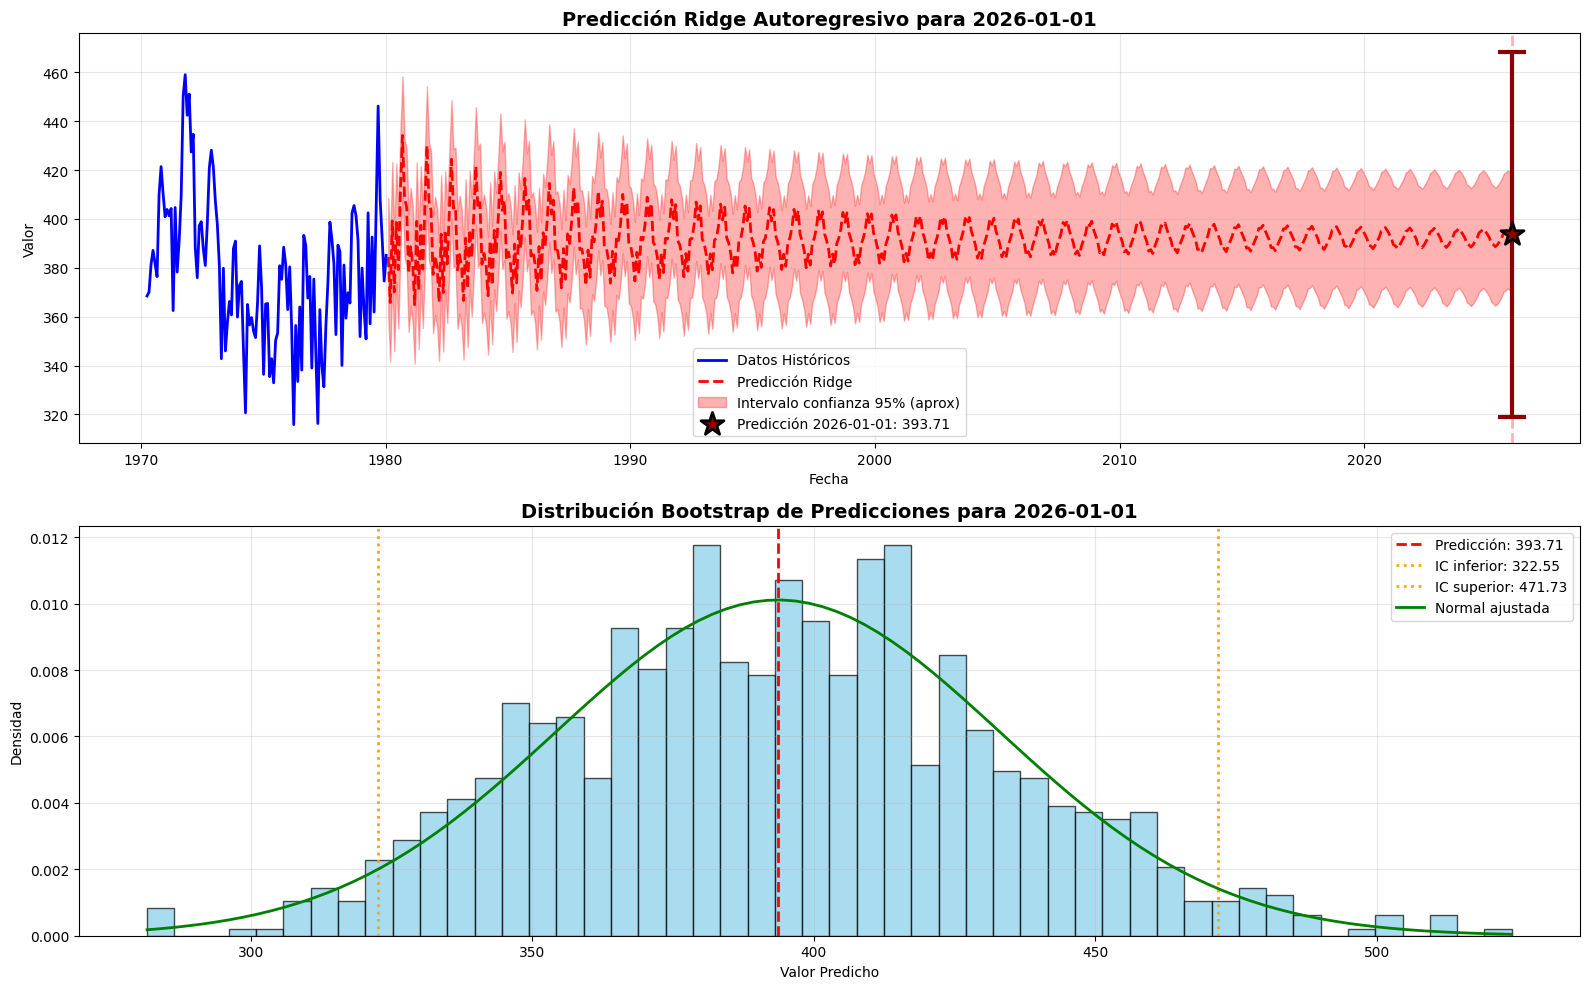

✓ Gráfico guardado en 'prediccion_ridge_2026_completa.png'


In [27]:
# ========================================
# VISUALIZACIÓN FINAL
# ========================================

fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Gráfico 1: Serie completa con predicciones
ultimos_anos = 120  # Últimos 10 años
axes[0].plot(df['date'].tail(ultimos_anos), df['value'].tail(ultimos_anos), 
            label='Datos Históricos', color='blue', linewidth=2)

# Predicciones futuras
axes[0].plot(fechas_futuro, predicciones_futuro, 
            label='Predicción Ridge', color='red', linewidth=2, linestyle='--')

# Intervalo de confianza (aproximado)
# Calcular intervalos para toda la serie futura (no solo 2026)
predicciones_futuro_array = np.array(predicciones_futuro)
limite_inf_serie = predicciones_futuro_array - 2*std_residuos
limite_sup_serie = predicciones_futuro_array + 2*std_residuos

axes[0].fill_between(fechas_futuro, limite_inf_serie, limite_sup_serie,
                     alpha=0.3, color='red', label='Intervalo confianza 95% (aprox)')

# Marcar 2026-01-01
axes[0].scatter([fecha_2026], [prediccion_2026], 
               color='darkred', s=300, zorder=5, marker='*',
               edgecolors='black', linewidths=2,
               label=f'Predicción 2026-01-01: {prediccion_2026:.2f}')

# Barra de error en 2026
axes[0].errorbar(fecha_2026, prediccion_2026, 
                yerr=incertidumbre,
                fmt='none', ecolor='darkred', elinewidth=3, 
                capsize=10, capthick=3, zorder=4)

axes[0].axvline(fecha_2026, color='red', linestyle='--', alpha=0.3, linewidth=2)

axes[0].set_title('Predicción Ridge Autoregresivo para 2026-01-01', 
                 fontsize=14, fontweight='bold')
axes[0].set_xlabel('Fecha')
axes[0].set_ylabel('Valor')
axes[0].legend(loc='best')
axes[0].grid(True, alpha=0.3)

# Gráfico 2: Distribución Bootstrap de predicciones 2026
axes[1].hist(predicciones_bootstrap, bins=50, density=True, 
            alpha=0.7, color='skyblue', edgecolor='black')

# Línea de predicción puntual
axes[1].axvline(prediccion_2026, color='red', linestyle='--', 
               linewidth=2, label=f'Predicción: {prediccion_2026:.2f}')

# Líneas de intervalos
axes[1].axvline(limite_inferior, color='orange', linestyle=':', 
               linewidth=2, label=f'IC inferior: {limite_inferior:.2f}')
axes[1].axvline(limite_superior, color='orange', linestyle=':', 
               linewidth=2, label=f'IC superior: {limite_superior:.2f}')

# Ajustar distribución normal
mu, sigma = np.mean(predicciones_bootstrap), np.std(predicciones_bootstrap)
x_dist = np.linspace(predicciones_bootstrap.min(), predicciones_bootstrap.max(), 100)
axes[1].plot(x_dist, stats.norm.pdf(x_dist, mu, sigma), 
            'g-', linewidth=2, label='Normal ajustada')

axes[1].set_title('Distribución Bootstrap de Predicciones para 2026-01-01', 
                 fontsize=14, fontweight='bold')
axes[1].set_xlabel('Valor Predicho')
axes[1].set_ylabel('Densidad')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('prediccion_ridge_2026_completa.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Gráfico guardado en 'prediccion_ridge_2026_completa.png'")


In [28]:
# ========================================
# SECCIÓN 5: PREDICCIÓN FINAL 2026-01-01
# ========================================

from scipy.special import inv_boxcox

print("\n" + "="*70)
print("5. PREDICCIÓN FINAL PARA 2026-01-01")
print("="*70)

# Cargar parámetros guardados
lambda_param = np.load('lambda_boxcox.npy')
d_param = np.load('d_parameter.npy')

print(f"Parámetros de transformación:")
print(f" Lambda Box-Cox: {lambda_param:.6f}")
print(f" Diferenciación (d): {d_param}")

# Revertir transformación Box-Cox para predicción e intervalos
arima_pred_original = inv_boxcox(arima_forecast_2026.iloc[-1], lambda_param)
limite_inferior_original = inv_boxcox(conf_int.iloc[-1, 0], lambda_param)
limite_superior_original = inv_boxcox(conf_int.iloc[-1, 1], lambda_param)

# Calcular amplitud del intervalo en escala original
amplitud_intervalo = limite_superior_original - limite_inferior_original
incertidumbre = amplitud_intervalo / 2

print(f"\n{'='*70}")
print("PREDICCIÓN FINAL PARA 2026-01-01 (ESCALA ORIGINAL)")
print(f"{'='*70}")
print(f"Predicción puntual: {arima_pred_original:.2f}")
print(f"Intervalo de confianza (95%):")
print(f"  Límite inferior: {limite_inferior_original:.2f}")
print(f"  Límite superior: {limite_superior_original:.2f}")
print(f"  Amplitud: {amplitud_intervalo:.2f}")
print(f"  Incertidumbre (±): {incertidumbre:.2f}")
print(f"\n⚠️ IMPORTANTE:")
print(f"   La predicción es {arima_pred_original:.2f} ± {incertidumbre:.2f}")
print(f"   Esto representa una incertidumbre del {(incertidumbre/arima_pred_original)*100:.1f}%")
print(f"{'='*70}\n")

# Crear DataFrame de resultados CON intervalos
results_final = pd.DataFrame({
    'Modelo': ['ARIMA'],
    'Predicción': [f"{arima_pred_original:.2f}"],
    'Límite Inferior': [f"{limite_inferior_original:.2f}"],
    'Límite Superior': [f"{limite_superior_original:.2f}"],
    'Incertidumbre (%)': [f"{(incertidumbre/arima_pred_original)*100:.1f}%"]
})

print("\nRESUMEN DE RESULTADOS:")
print(results_final.to_string(index=False))

# Guardar resultados
results_final.to_csv('predicciones_2026.csv', index=False)
print("\n✓ Resultados guardados en 'predicciones_2026.csv'")



5. PREDICCIÓN FINAL PARA 2026-01-01
Parámetros de transformación:
 Lambda Box-Cox: -0.187174
 Diferenciación (d): 1

PREDICCIÓN FINAL PARA 2026-01-01 (ESCALA ORIGINAL)
Predicción puntual: 382.09
Intervalo de confianza (95%):
  Límite inferior: 73.54
  Límite superior: 4191.48
  Amplitud: 4117.94
  Incertidumbre (±): 2058.97

⚠️ IMPORTANTE:
   La predicción es 382.09 ± 2058.97
   Esto representa una incertidumbre del 538.9%


RESUMEN DE RESULTADOS:
Modelo Predicción Límite Inferior Límite Superior Incertidumbre (%)
 ARIMA     382.09           73.54         4191.48            538.9%

✓ Resultados guardados en 'predicciones_2026.csv'


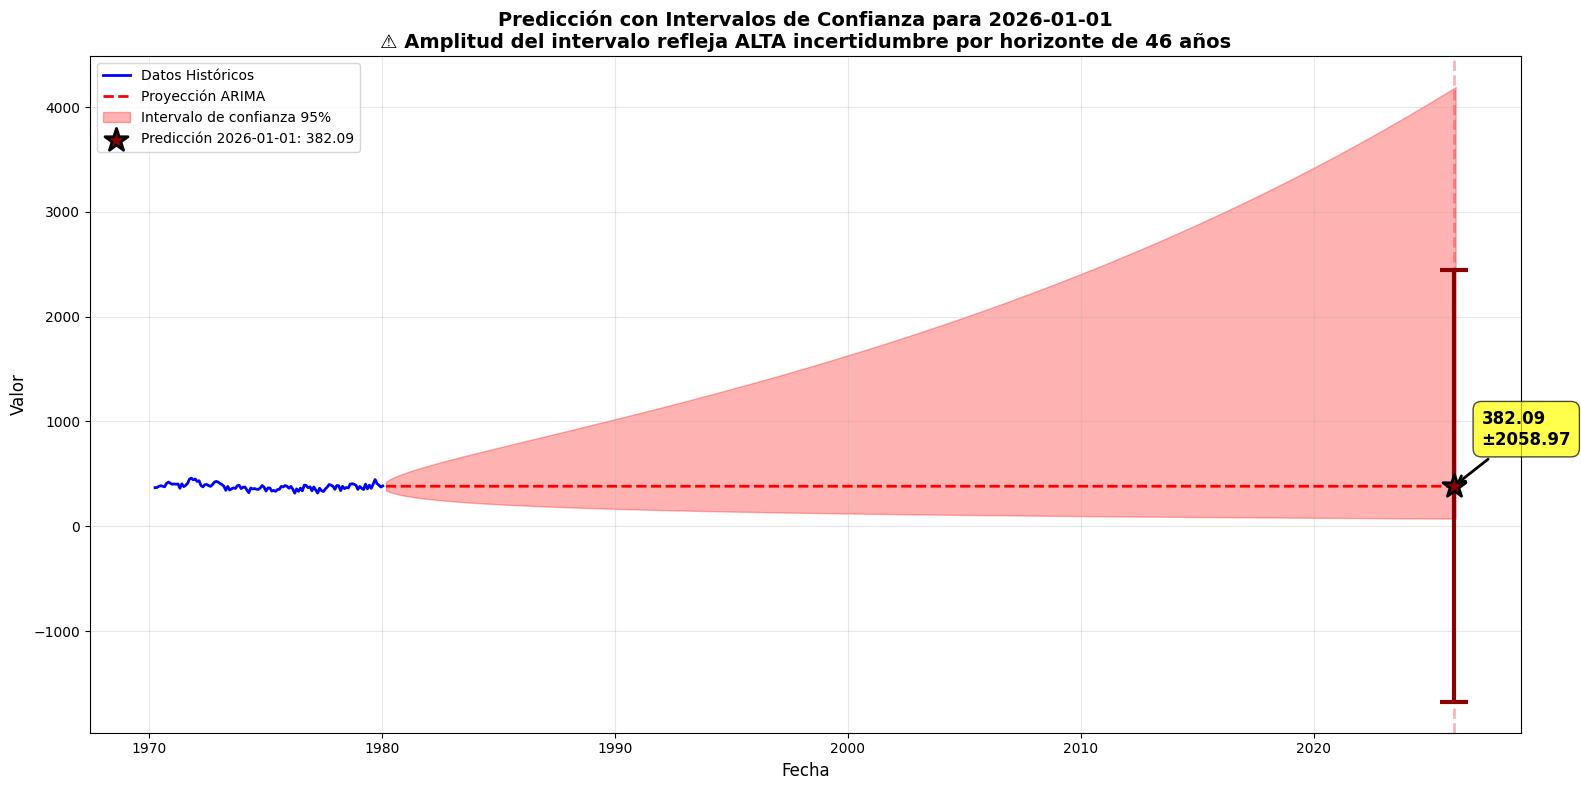

✓ Gráfico guardado en 'prediccion_final_2026_con_intervalos.png'


In [29]:
# Visualización final con proyección E INTERVALOS DE CONFIANZA
fig, ax = plt.subplots(figsize=(16, 8))

# Datos históricos (últimos 10 años para mejor visualización)
ultimos_anos = 120  # 10 años * 12 meses
ax.plot(df['date'].tail(ultimos_anos), df['value'].tail(ultimos_anos), 
        label='Datos Históricos', color='blue', linewidth=2)

# Crear fechas futuras para visualizar toda la proyección
future_dates = pd.date_range(start=df['date'].iloc[-1] + pd.DateOffset(months=1),
                             periods=months_to_predict,
                             freq='MS')

# Revertir TODAS las predicciones futuras (no solo 2026-01-01)
arima_pred_series_original = inv_boxcox(arima_forecast_2026.values, lambda_param)
limite_inferior_series = inv_boxcox(conf_int.iloc[:, 0].values, lambda_param)
limite_superior_series = inv_boxcox(conf_int.iloc[:, 1].values, lambda_param)

# Graficar predicciones futuras
ax.plot(future_dates, arima_pred_series_original, 
        color='red', linewidth=2, linestyle='--', 
        label='Proyección ARIMA')

# CLAVE: Graficar intervalo de confianza
ax.fill_between(future_dates, 
                limite_inferior_series,
                limite_superior_series,
                alpha=0.3, color='red', 
                label='Intervalo de confianza 95%')

# Destacar el punto 2026-01-01
future_date = pd.to_datetime('2026-01-01')
ax.scatter(future_date, arima_pred_original, 
          color='darkred', s=300, zorder=5, marker='*',
          edgecolors='black', linewidths=2,
          label=f'Predicción 2026-01-01: {arima_pred_original:.2f}')

# Añadir barra de error vertical en 2026-01-01
ax.errorbar(future_date, arima_pred_original, 
           yerr=incertidumbre,
           fmt='none', ecolor='darkred', elinewidth=3, 
           capsize=10, capthick=3, zorder=4)

# Línea vertical en 2026
ax.axvline(future_date, color='red', linestyle='--', alpha=0.3, linewidth=2)

# Anotación con los valores
ax.annotate(f'{arima_pred_original:.2f}\n±{incertidumbre:.2f}',
           xy=(future_date, arima_pred_original),
           xytext=(20, 30), textcoords='offset points',
           bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.7),
           arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', lw=2),
           fontsize=12, fontweight='bold')

ax.set_title('Predicción con Intervalos de Confianza para 2026-01-01\n⚠️ Amplitud del intervalo refleja ALTA incertidumbre por horizonte de 46 años', 
            fontsize=14, fontweight='bold')
ax.set_xlabel('Fecha', fontsize=12)
ax.set_ylabel('Valor', fontsize=12)
ax.legend(loc='best', fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('prediccion_final_2026_con_intervalos.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Gráfico guardado en 'prediccion_final_2026_con_intervalos.png'")
